In [1]:
#import libraries

import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt

import missingno as msno

import seaborn as sns

In [2]:
#load dataset
df=pd.read_csv(r"C:\Users\Asus\Downloads\week-10-mini-project-31we1rt1jk32l5asz\data\housing.csv")
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [3]:
df.shape

(20640, 10)

In [4]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [5]:
df['ocean_proximity']=df['ocean_proximity'].astype('category')

In [6]:
df.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity       category
dtype: object

In [7]:
from sklearn.model_selection import train_test_split 

In [8]:
train_set,test_set=train_test_split(df,test_size=0.2)

In [9]:
train_set.shape

(16512, 10)

<Axes: >

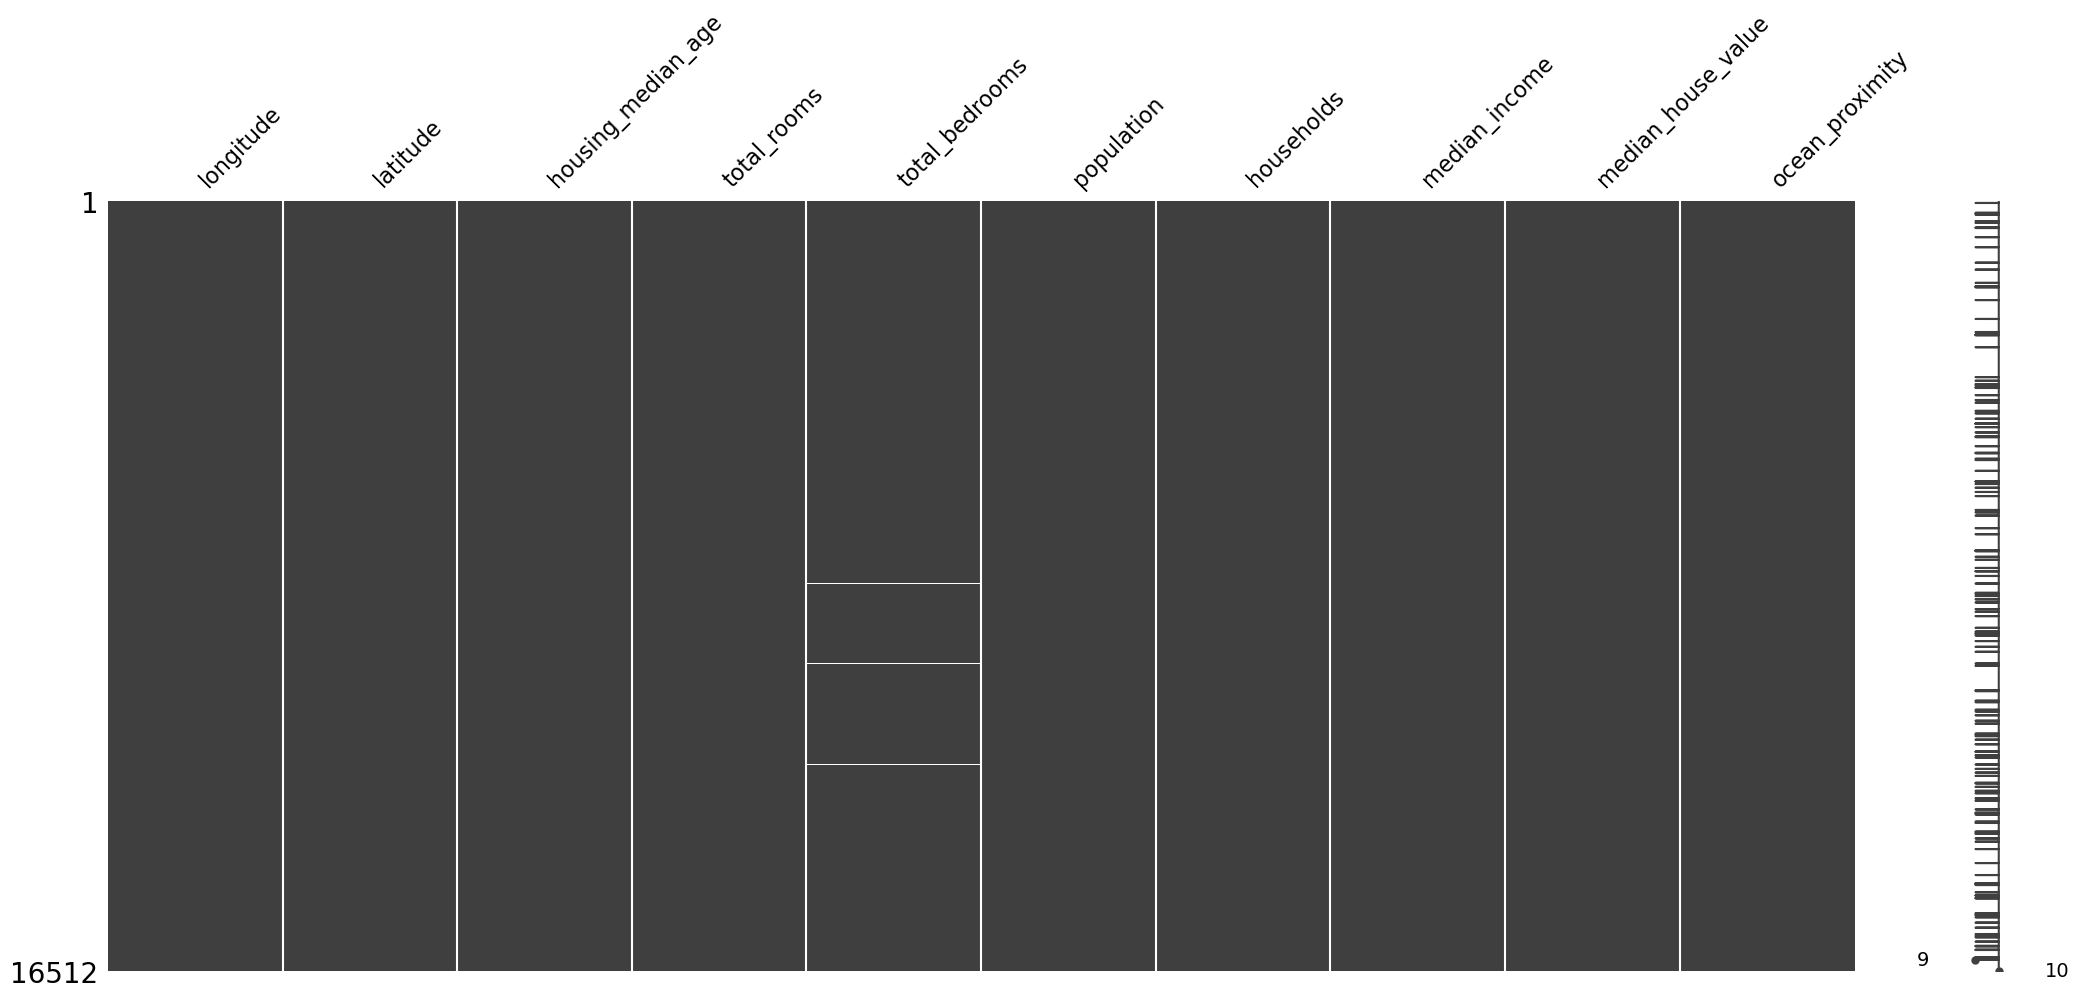

In [10]:
msno.matrix(train_set)

In [11]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16456 to 11159
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   median_house_value  16512 non-null  float64 
 9   ocean_proximity     16512 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.3 MB


In [12]:
#diagnose missing values
def diagnose_mv(df, mv_column):
    cols = list(df.columns)
    cols.remove(mv_column)
    flags = df[mv_column].isna()
    fig, ax = plt.subplots(len(cols), 3, 
                           figsize=(len(cols)+3, len(cols)+3), 
                           constrained_layout=True)
    plt.rcParams['axes.grid'] = True
    for i, col in enumerate(cols):
        n1, bins, _ = ax[i, 0].hist(df[col])
        ax[i, 0].set_title(f'{col} with MV')
        #
        n2, _, _ = ax[i, 1].hist(df[col][~flags], bins=bins)
        ax[i, 1].set_title(f'{col} without MV')
        #
        ax[i, 2].bar(bins[:-1], np.abs(n2-n1), width=np.abs(bins[1]-bins[0]))
        ax[i, 2].set_title(f'Difference')

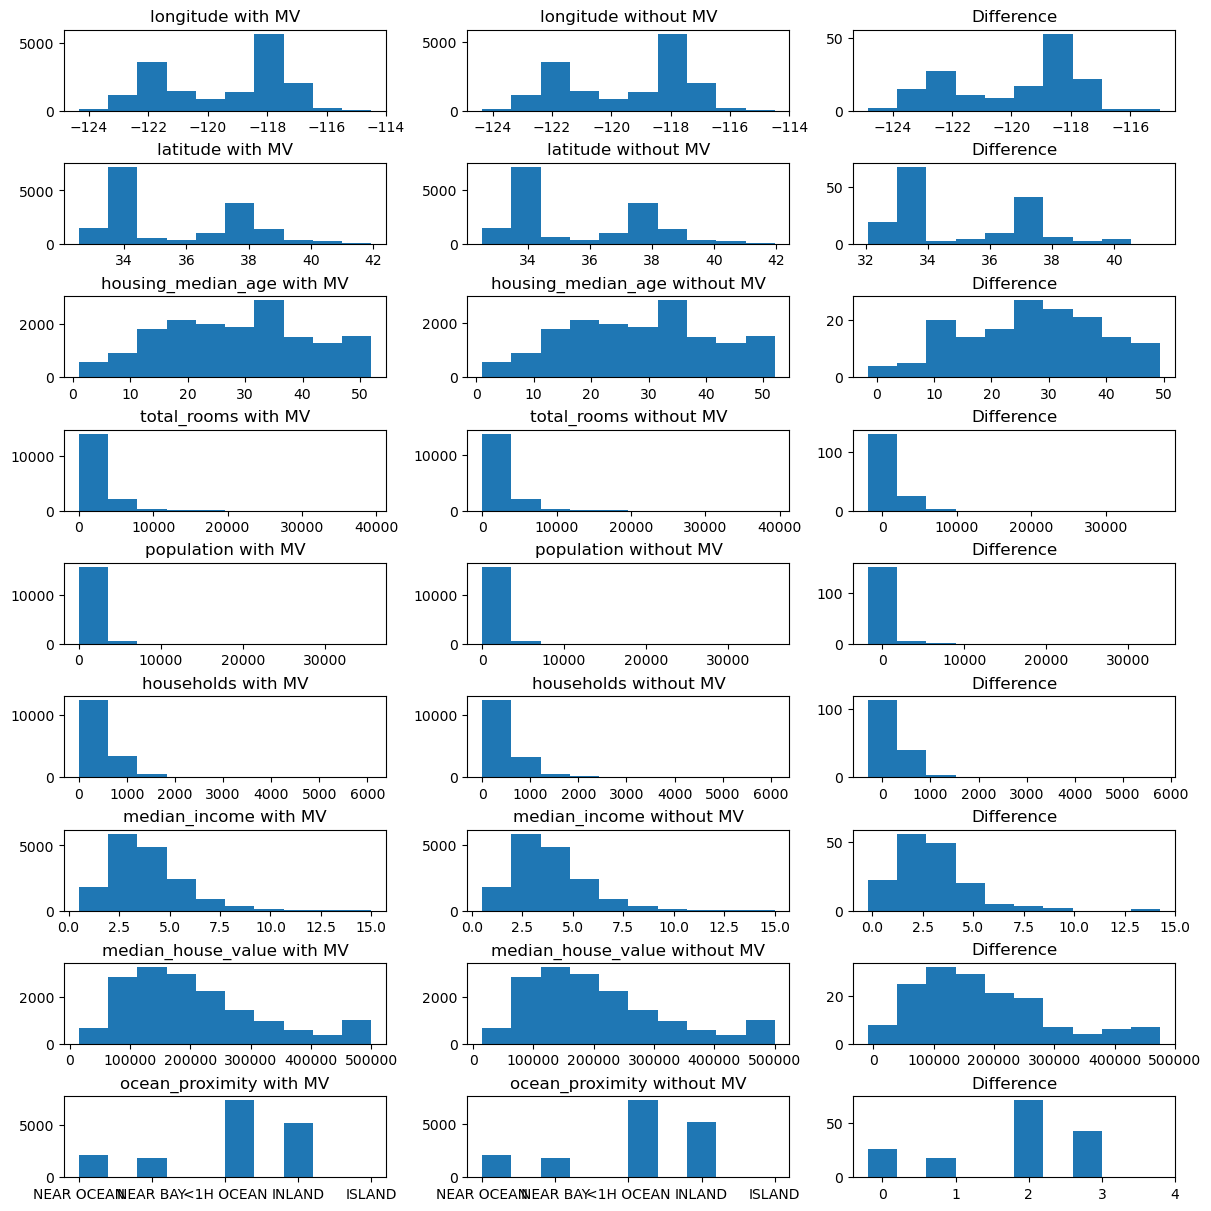

In [13]:
diagnose_mv(train_set,'total_bedrooms')

In [62]:
#handking missing values
m=train_set['total_bedrooms'].median()
m

435.0

C:\Users\Asus\AppData\Local\Temp\ipykernel_14408\1387379983.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_set['total_bedrooms'].fillna(m,inplace=True)


<Axes: >

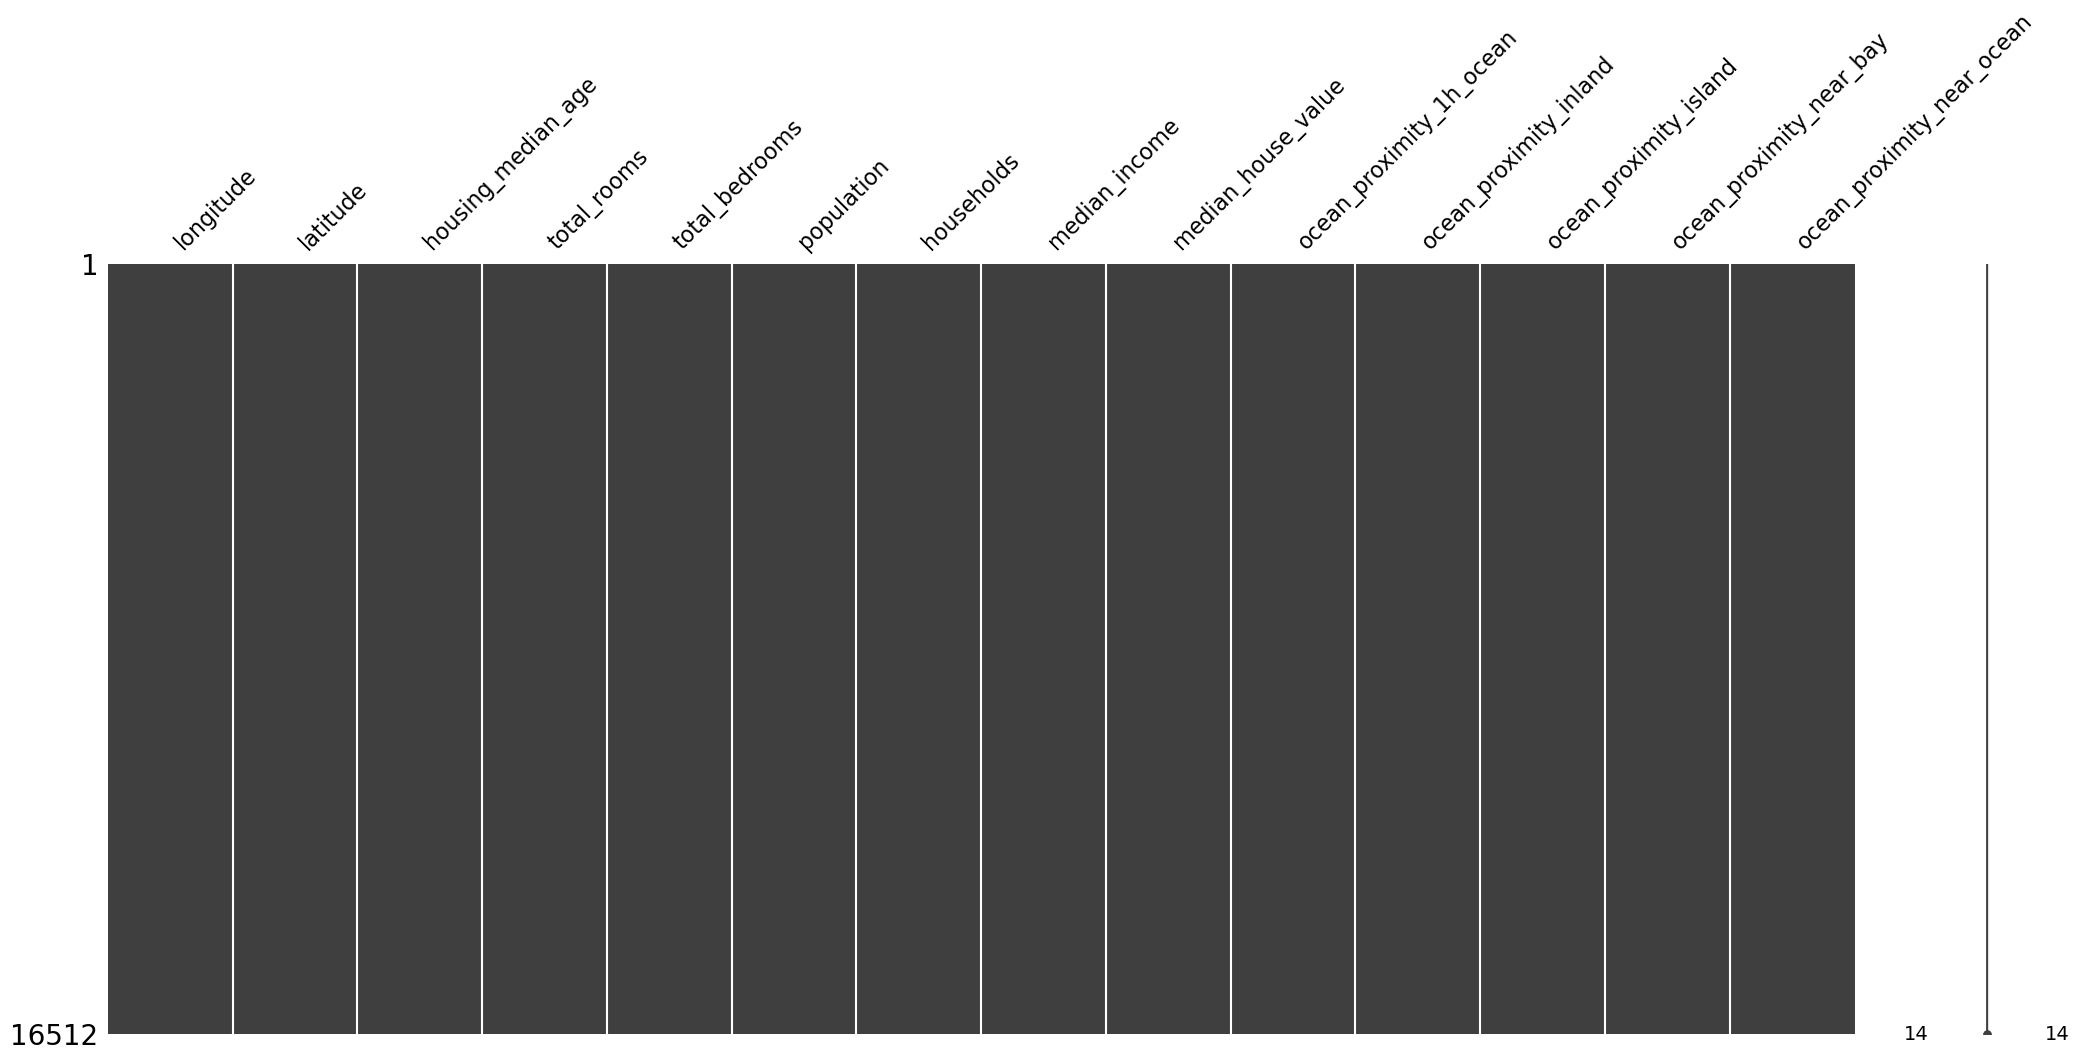

In [63]:
train_set['total_bedrooms'].fillna(m,inplace=True)
train_set['total_bedrooms'].isna().sum()
msno.matrix(train_set)

In [16]:
train_set=pd.get_dummies(train_set,columns=['ocean_proximity'],dtype=np.float64)

In [17]:
train_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16456    -118.17     33.83                45.0       1808.0           315.0   
3484     -122.11     37.37                49.0       1068.0           190.0   
16089    -122.42     37.75                52.0       2163.0           607.0   
18184    -117.09     32.64                24.0       3613.0           973.0   
19393    -118.28     34.06                17.0       2518.0          1196.0   

       population  households  median_income  median_house_value  \
16456       800.0       302.0         4.8693            277700.0   
3484        410.0       171.0         7.2045            500001.0   
16089      1447.0       546.0         3.3555            275000.0   
18184      2002.0       931.0         1.9470            147500.0   
19393      3051.0      1000.0         1.7199            175000.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
16456                        0.0                     0.0   
3484                         0.0                     0.0   
16089                        0.0                     0.0   
18184                        0.0                     0.0   
19393                        1.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
16456                     0.0                       0.0   
3484                      0.0                       1.0   
16089                     0.0                       1.0   
18184                     0.0                       0.0   
19393                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
16456                         1.0  
3484                          0.0  
16089                         0.0  
18184                         1.0  
19393                         0.0

In [18]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16456 to 11159
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   16512 non-null  float64
 1   latitude                    16512 non-null  float64
 2   housing_median_age          16512 non-null  float64
 3   total_rooms                 16512 non-null  float64
 4   total_bedrooms              16512 non-null  float64
 5   population                  16512 non-null  float64
 6   households                  16512 non-null  float64
 7   median_income               16512 non-null  float64
 8   median_house_value          16512 non-null  float64
 9   ocean_proximity_<1H OCEAN   16512 non-null  float64
 10  ocean_proximity_INLAND      16512 non-null  float64
 11  ocean_proximity_ISLAND      16512 non-null  float64
 12  ocean_proximity_NEAR BAY    16512 non-null  float64
 13  ocean_proximity_NEAR OCEAN  1651

In [19]:
train_set.columns
train_set.rename(columns={'ocean_proximity_<1H OCEAN': 'ocean_proximity_1h_ocean', 
                        'ocean_proximity_INLAND': 'ocean_proximity_inland',
                        'ocean_proximity_ISLAND': 'ocean_proximity_island', 
                        'ocean_proximity_NEAR BAY': 'ocean_proximity_near_bay',
                        'ocean_proximity_NEAR OCEAN': 'ocean_proximity_near_ocean'}, inplace=True)
train_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16456    -118.17     33.83                45.0       1808.0           315.0   
3484     -122.11     37.37                49.0       1068.0           190.0   
16089    -122.42     37.75                52.0       2163.0           607.0   
18184    -117.09     32.64                24.0       3613.0           973.0   
19393    -118.28     34.06                17.0       2518.0          1196.0   

       population  households  median_income  median_house_value  \
16456       800.0       302.0         4.8693            277700.0   
3484        410.0       171.0         7.2045            500001.0   
16089      1447.0       546.0         3.3555            275000.0   
18184      2002.0       931.0         1.9470            147500.0   
19393      3051.0      1000.0         1.7199            175000.0   

       ocean_proximity_1h_ocean  ocean_proximity_inland  \
16456                       0.0                     0.0   
3484                        0.0                     0.0   
16089                       0.0                     0.0   
18184                       0.0                     0.0   
19393                       1.0                     0.0   

       ocean_proximity_island  ocean_proximity_near_bay  \
16456                     0.0                       0.0   
3484                      0.0                       1.0   
16089                     0.0                       1.0   
18184                     0.0                       0.0   
19393                     0.0                       0.0   

       ocean_proximity_near_ocean  
16456                         1.0  
3484                          0.0  
16089                         0.0  
18184                         1.0  
19393                         0.0

# EDA

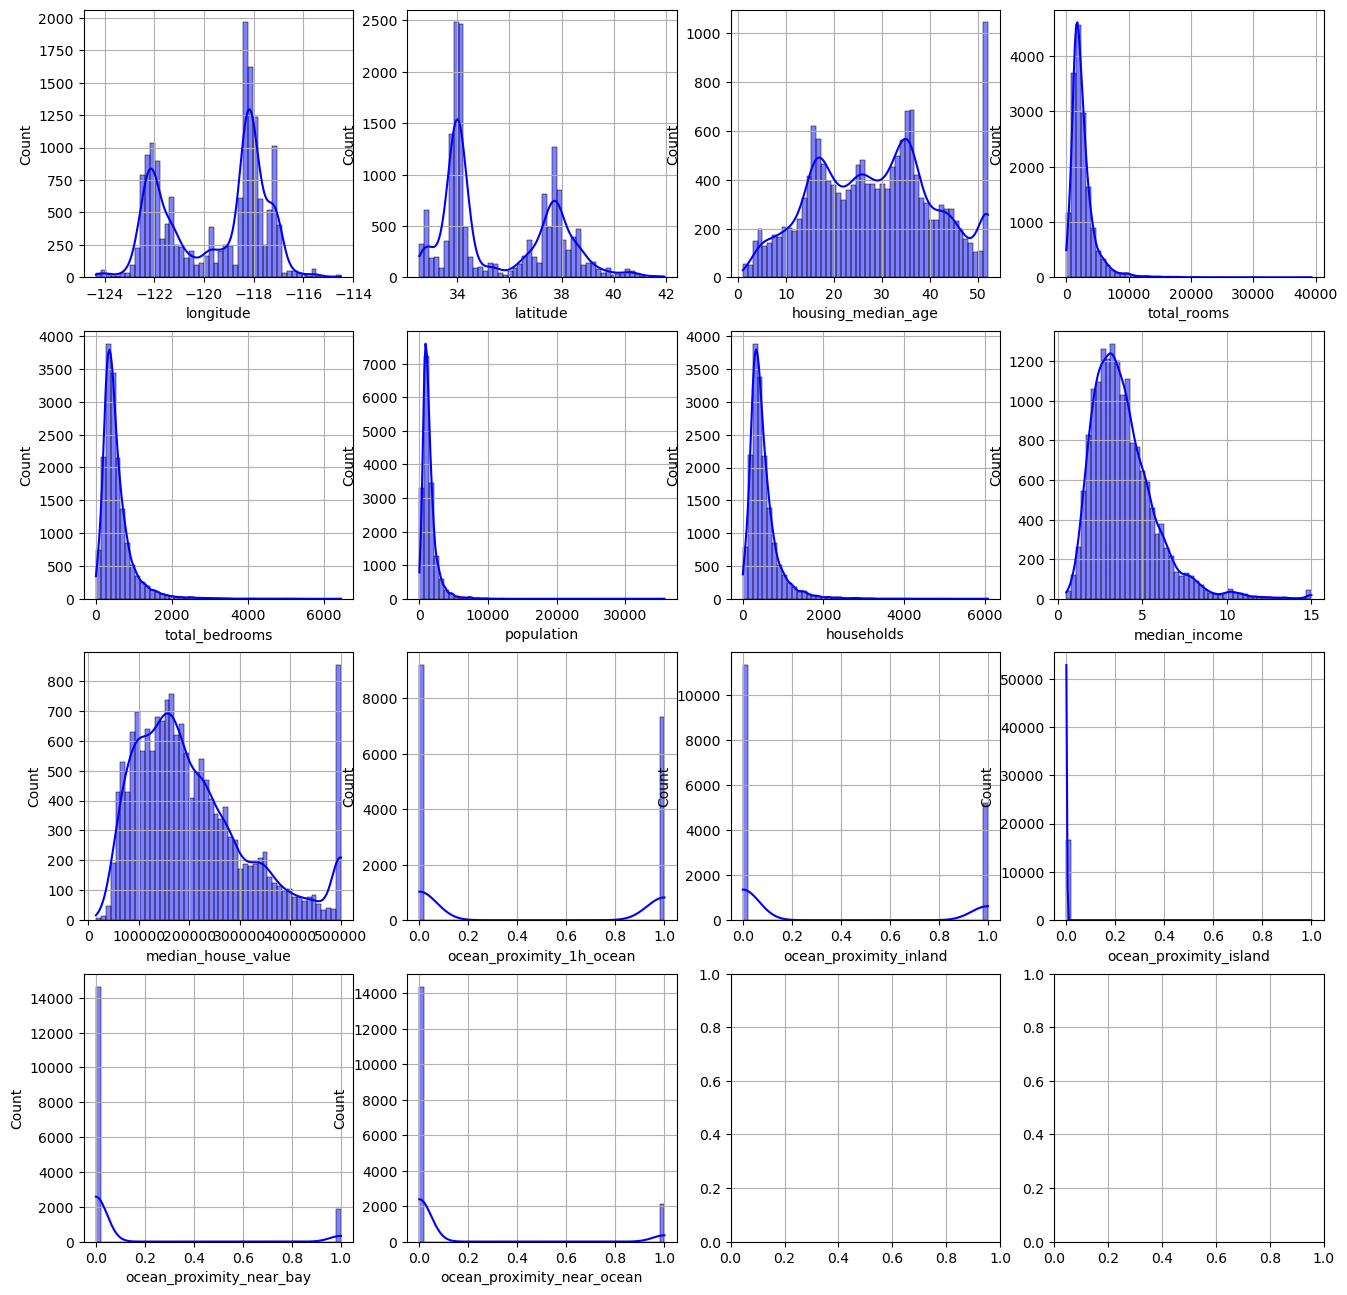

In [20]:
fig,axes=plt.subplots(4,4,figsize=(16,16))
axes_flat=axes.flatten()

for i,col in enumerate(train_set.columns):
    ax=axes_flat[i]
    #ax.hist(train_set[col],50)
    #ax.set_title(col)
    sns.histplot(train_set[col],bins=50,kde=True,color='blue',ax=ax)

(array([2.290e+03, 0.000e+00, 9.136e+03, 0.000e+00, 0.000e+00, 6.551e+03,
        0.000e+00, 2.658e+03, 0.000e+00, 5.000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

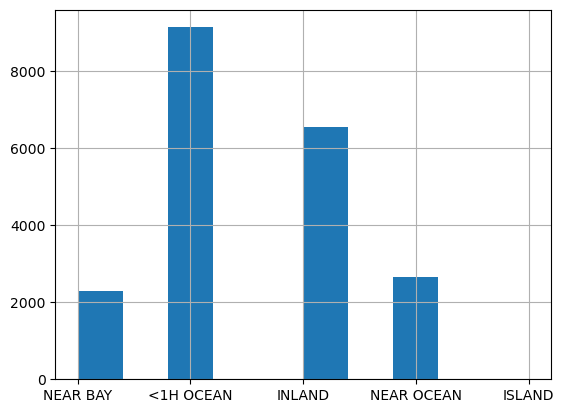

In [21]:
plt.hist(df.ocean_proximity)

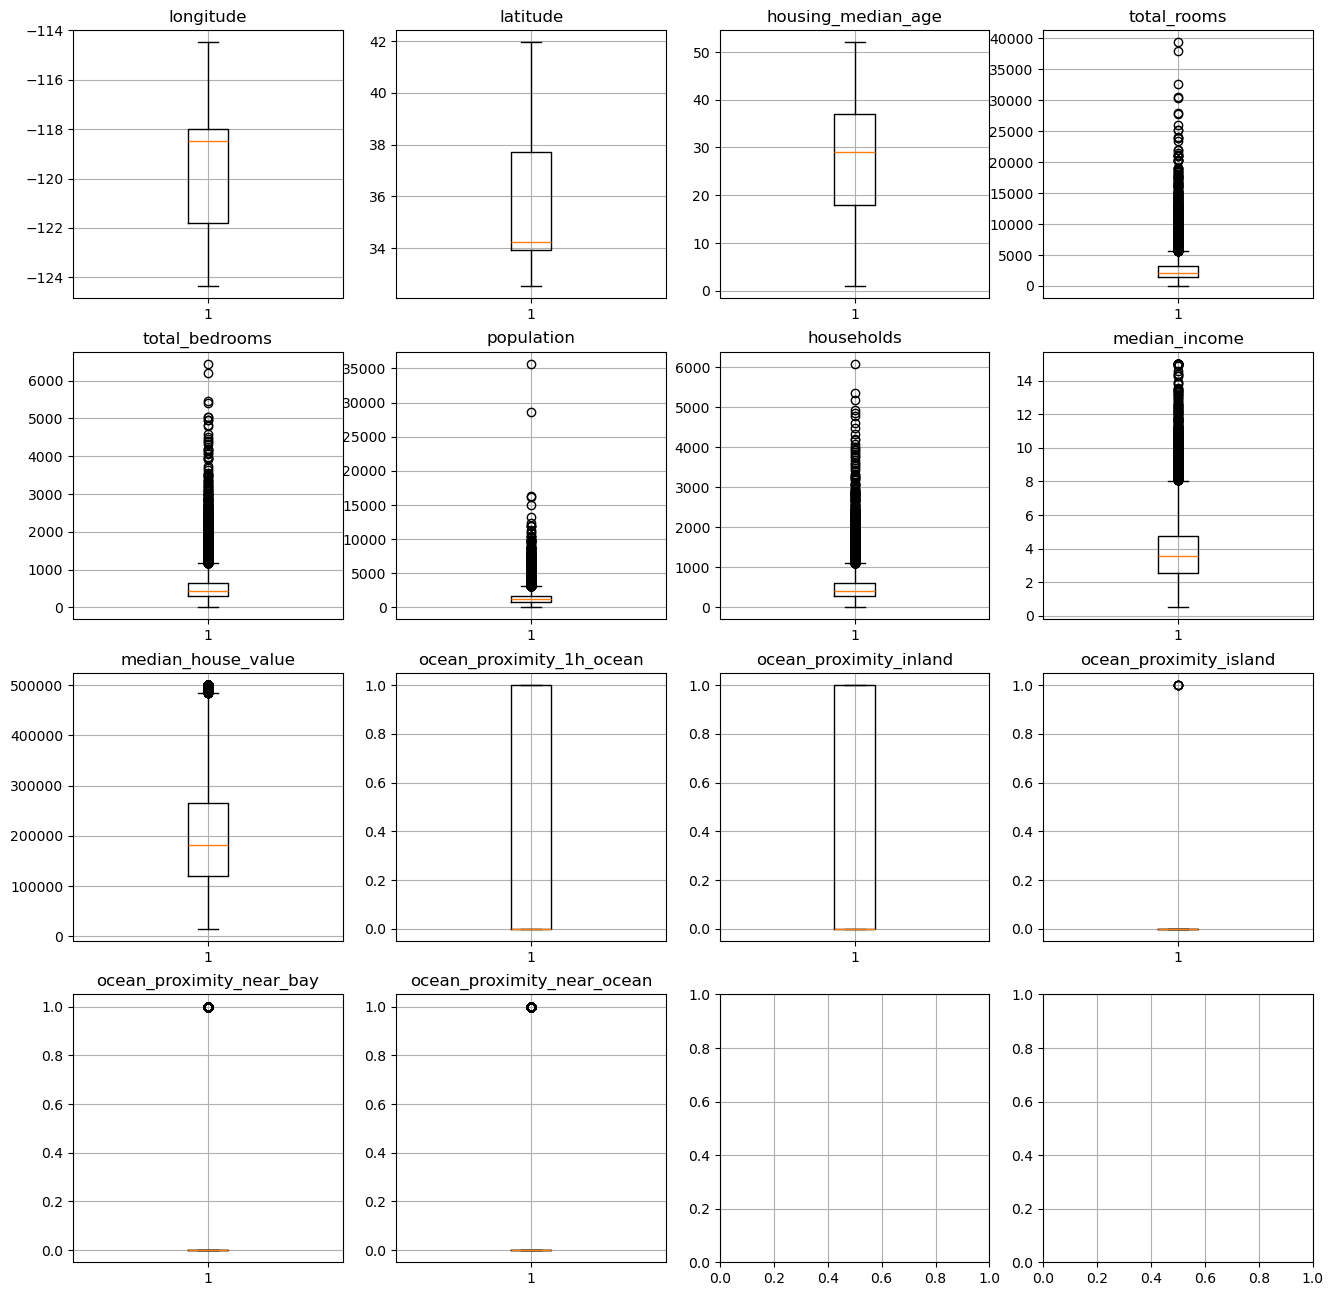

In [22]:
fig,axes=plt.subplots(4,4,figsize=(16,16))
axes_flat=axes.flatten()

for i,col in enumerate(train_set.columns):
    ax=axes_flat[i]
    ax.boxplot(train_set[col])
    ax.set_title(col)

<Axes: >

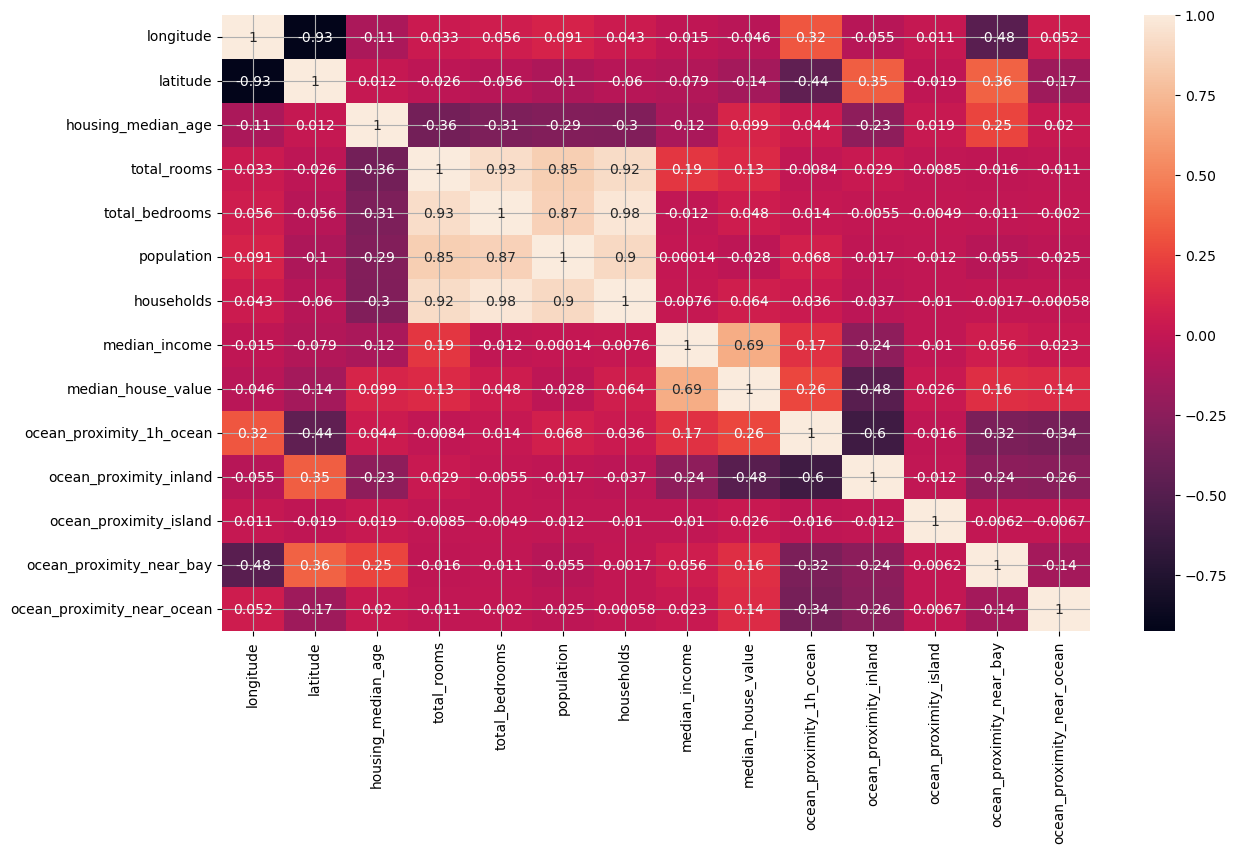

In [23]:
plt.figure(figsize=(14,8))
sns.heatmap(train_set.corr(),annot=True)

In [24]:
corr=train_set.corr()
corr[['median_house_value']].abs().sort_values(by='median_house_value')

median_house_value
ocean_proximity_island                0.025983
population                            0.027883
longitude                             0.046414
total_bedrooms                        0.048434
households                            0.063642
housing_median_age                    0.099177
total_rooms                           0.131682
ocean_proximity_near_ocean            0.136844
latitude                              0.142811
ocean_proximity_near_bay              0.157311
ocean_proximity_1h_ocean              0.256814
ocean_proximity_inland                0.481642
median_income                         0.688413
median_house_value                    1.000000

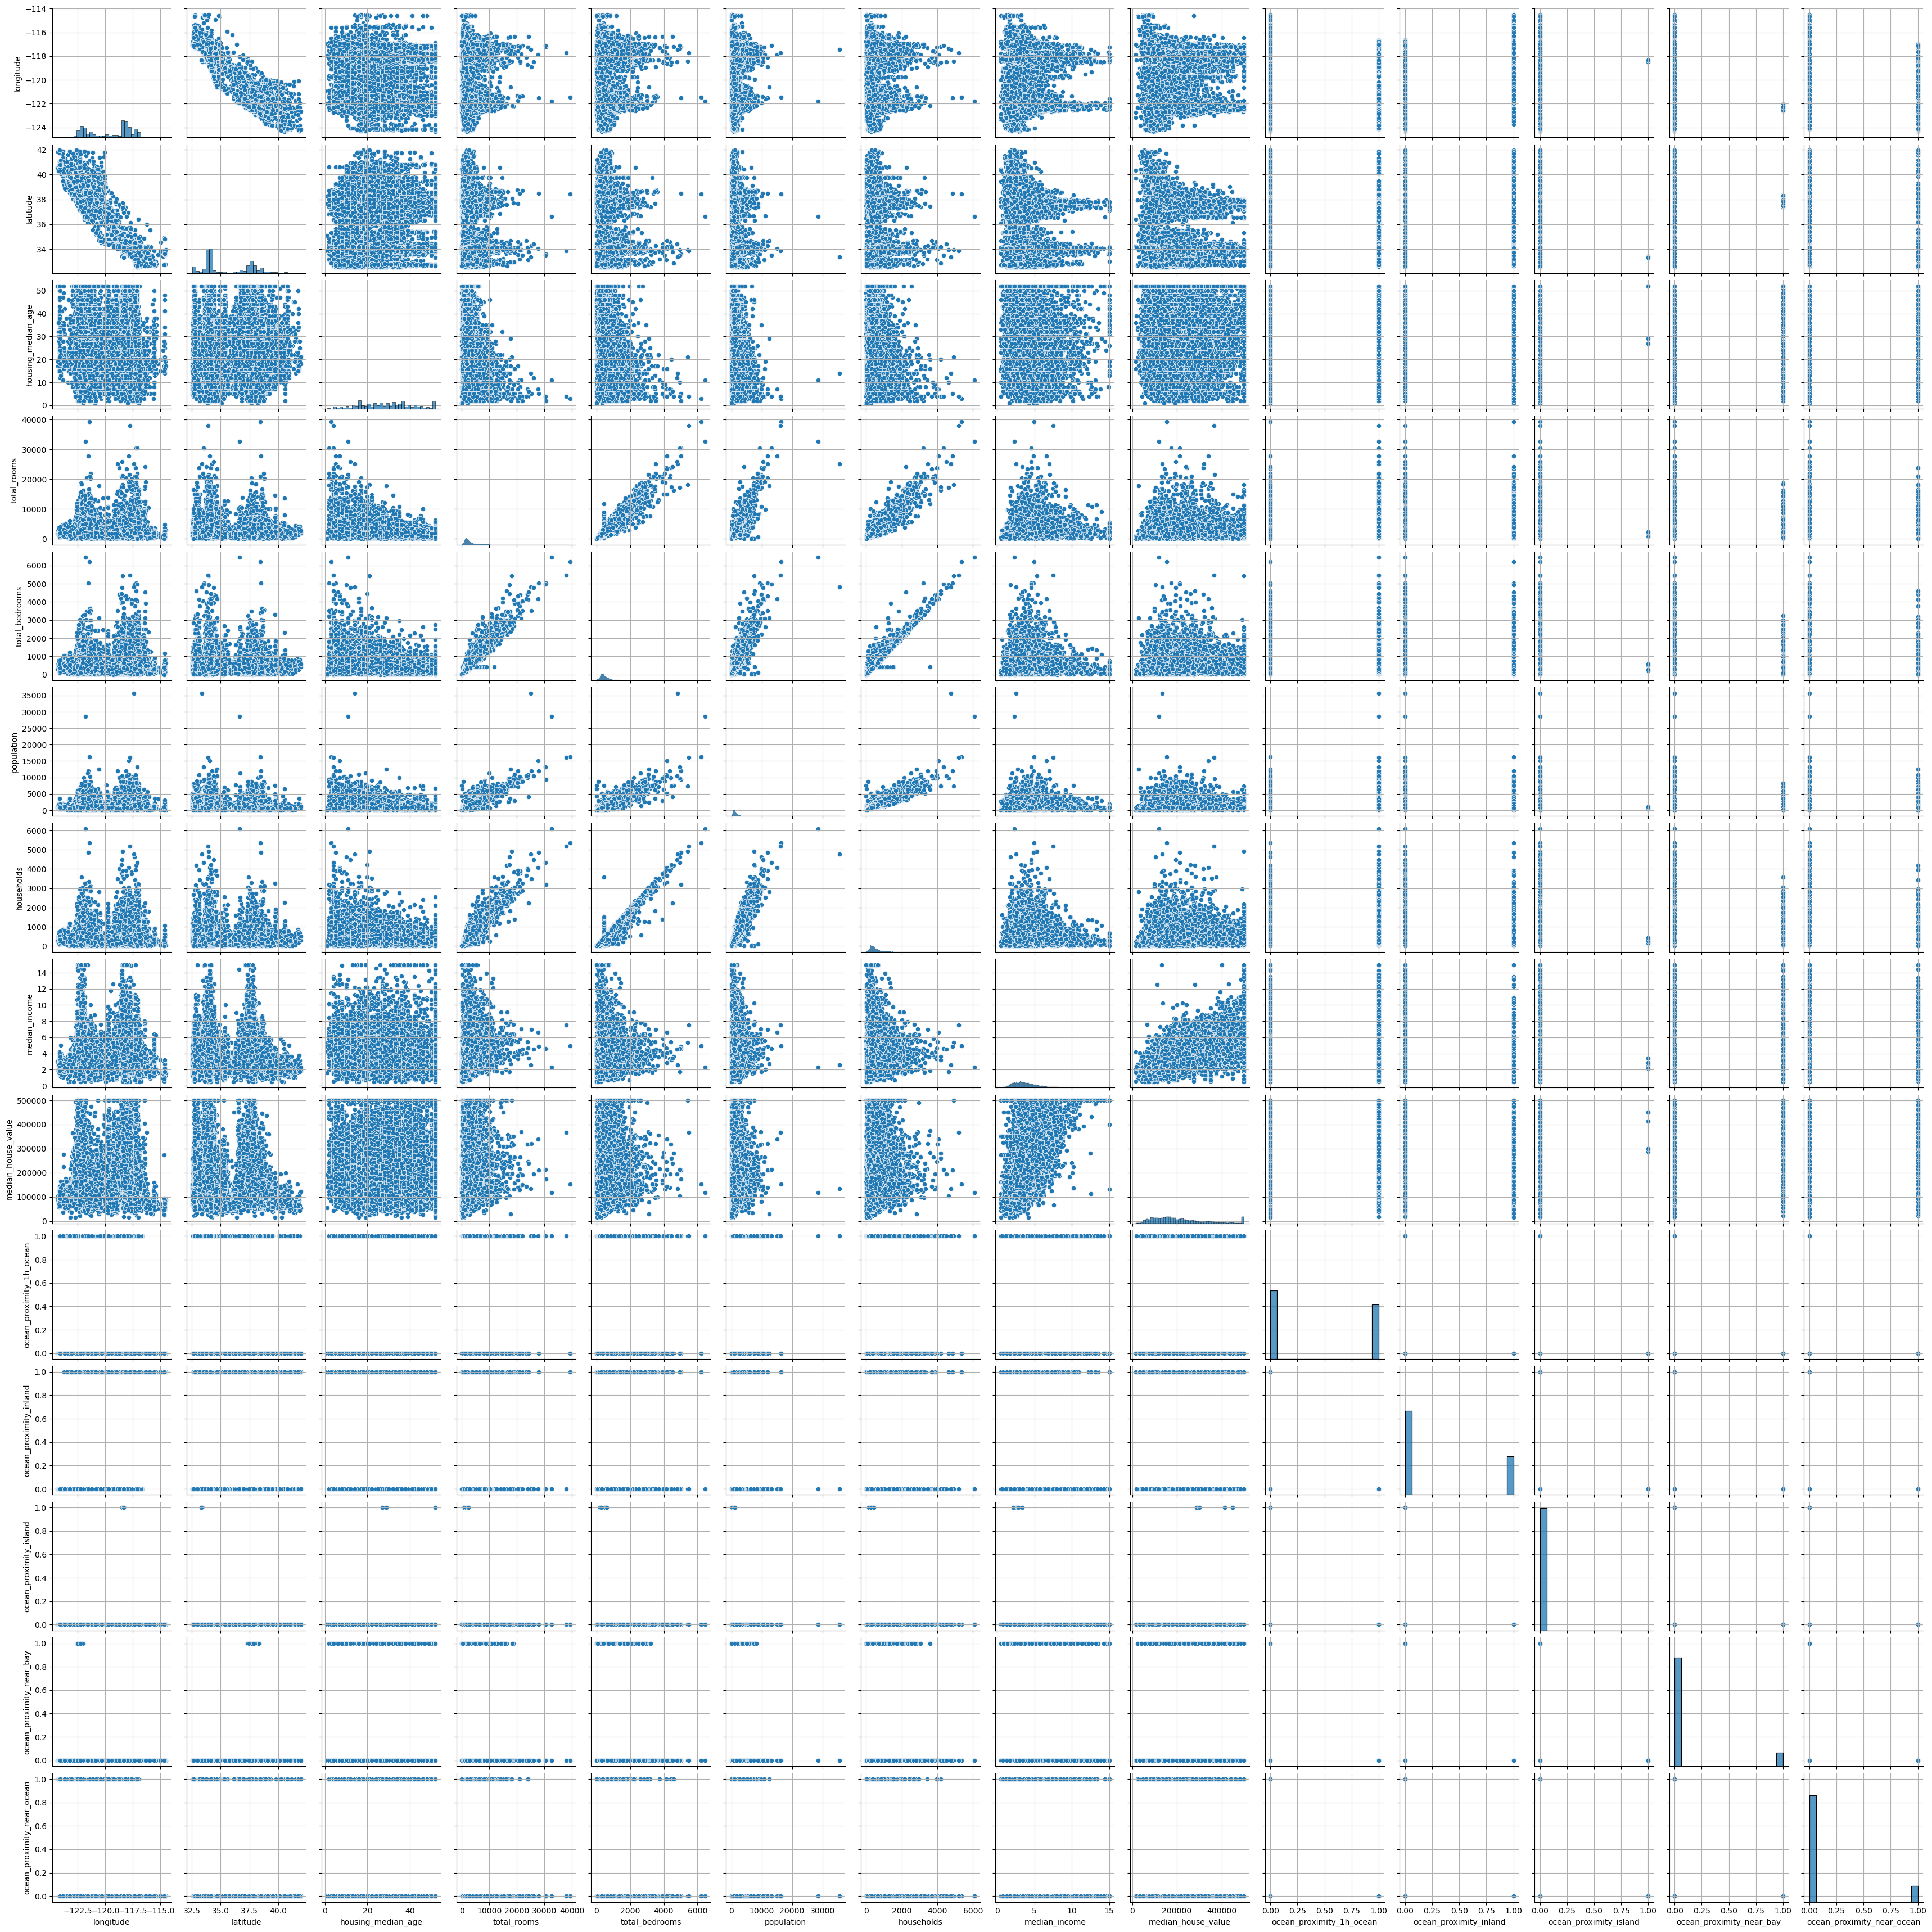

In [25]:
sns.pairplot(train_set)

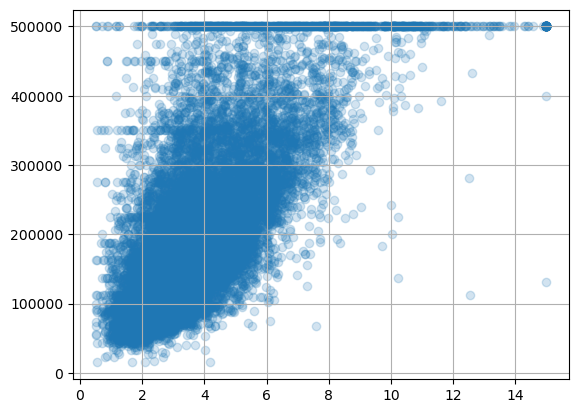

In [26]:
plt.scatter(train_set['median_income'],train_set['median_house_value'],alpha=0.2)

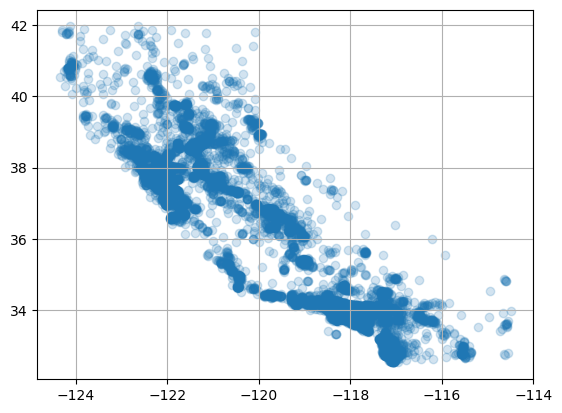

In [27]:
plt.scatter(train_set['longitude'],train_set['latitude'],alpha=0.2)

<Figure size 1600x1000 with 0 Axes>

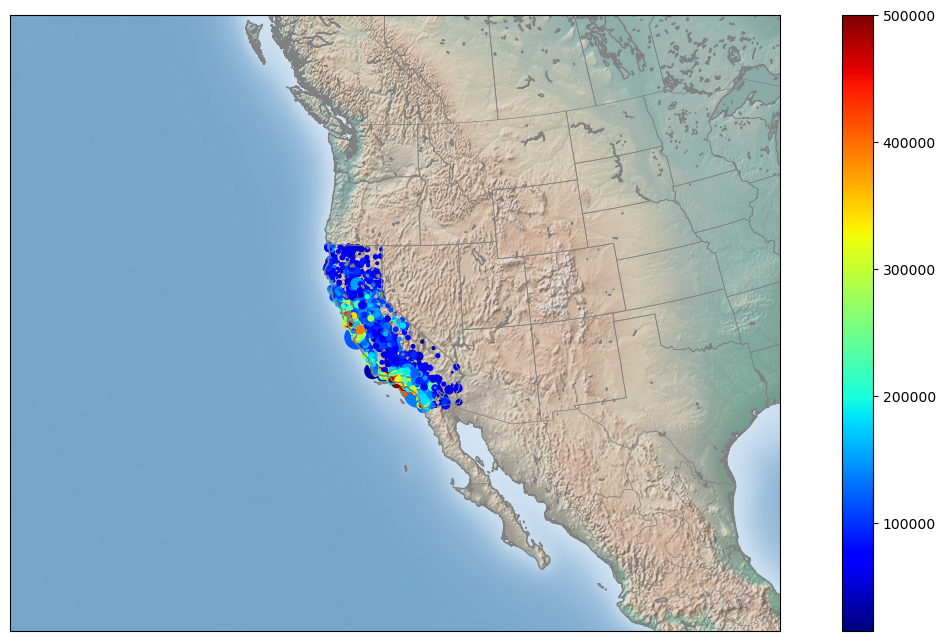

In [28]:
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(16,10))

plt.figure(figsize=(16,8))
m = Basemap(projection='lcc', resolution='h',
            lat_0=37.5, lon_0=-119,
            width=5E6, height=4E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

m.scatter(train_set['longitude'], train_set['latitude'],latlon=True,c=train_set['median_house_value'],cmap='jet',s=train_set.population/100)
plt.colorbar()

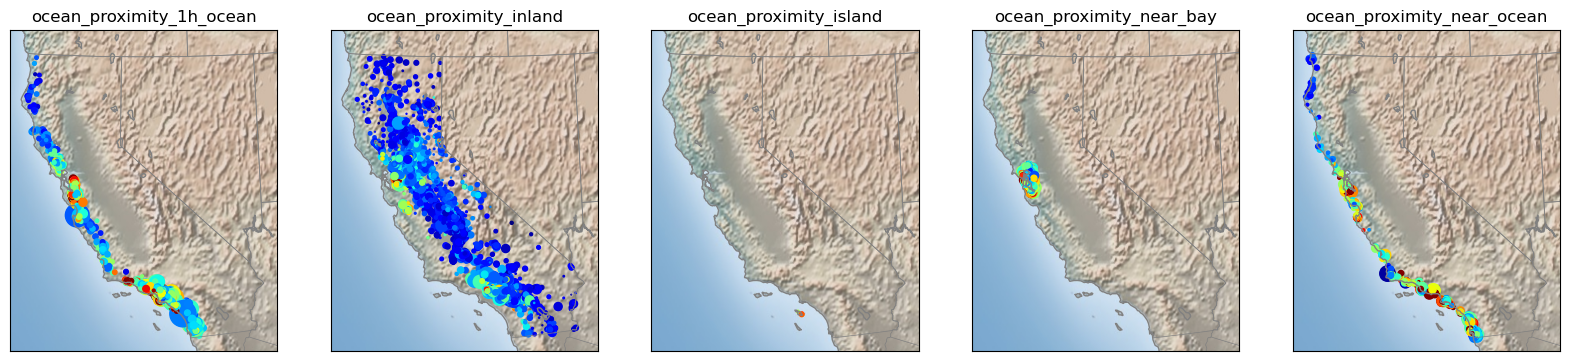

In [29]:
from mpl_toolkits.basemap import Basemap

ocean_cats = train_set.iloc[:, 9:].columns
fig, axes = plt.subplots(1, len(ocean_cats), figsize=(20, 6))

for i, cat in enumerate(ocean_cats):
    # Map
    m = Basemap(projection='lcc', resolution='i',
            lat_0=37.5, lon_0=-119,
            width=1e6, height=1.2e6, ax=axes[i])
    m.shadedrelief()
    m.drawcoastlines(color='gray')
    m.drawcountries(color='gray')
    m.drawstates(color='gray')

    flags = train_set[cat].astype(np.bool_)
    m.scatter(train_set.longitude[flags], train_set.latitude[flags], latlon=True, 
              c=train_set.median_house_value.values[flags], cmap='jet', 
              s=train_set.population[flags]/100,
              vmin=train_set.median_house_value.min(), 
              vmax=train_set.median_house_value.max())
    
    axes[i].set_title(cat)

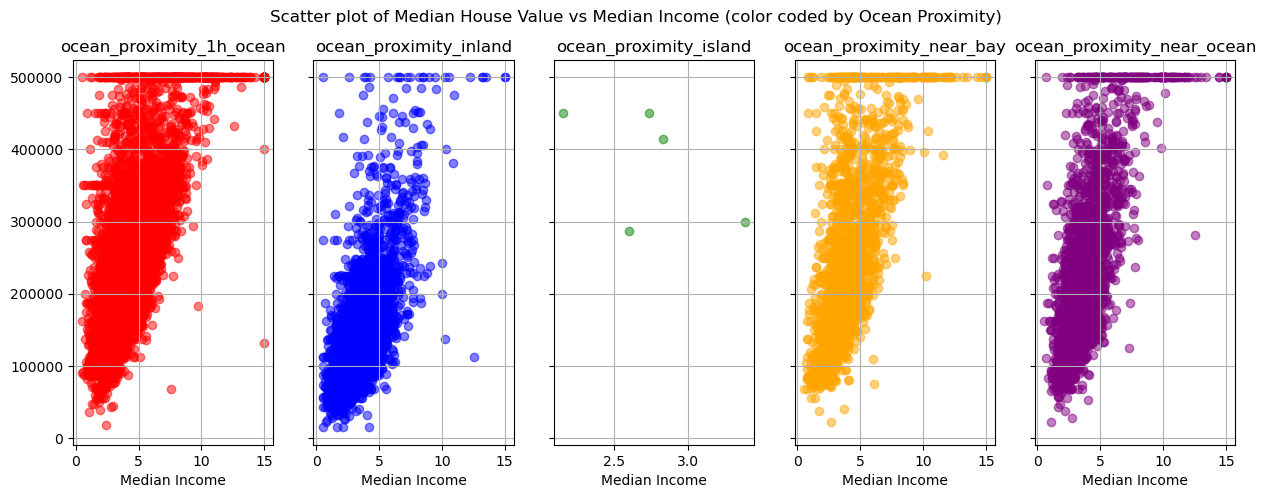

In [30]:
# create a colormap for the ocean_proximity categories
colormap = ['red', 'blue', 'green', 'orange', 'purple']

# get unique categories of ocean_proximity
ocean_cats = train_set.iloc[:, 9:].columns

# create a subplot for each category
fig, axes = plt.subplots(1, len(ocean_cats), figsize=(15, 5), sharey=True)

# plot a scatter of median_house_value and median_income for each category of ocean_proximity
for i, cat in enumerate(ocean_cats):
    ax = axes[i]
    flags = train_set[cat].astype(np.bool_)
    ax.scatter(train_set.median_income[flags], 
               train_set.median_house_value[flags], 
               color=colormap[i], alpha=0.5)
    ax.set_xlabel('Median Income')
    ax.set_title(cat)

# set common y-axis label and title
fig.suptitle('Scatter plot of Median House Value vs Median Income (color coded by Ocean Proximity)')

plt.show()


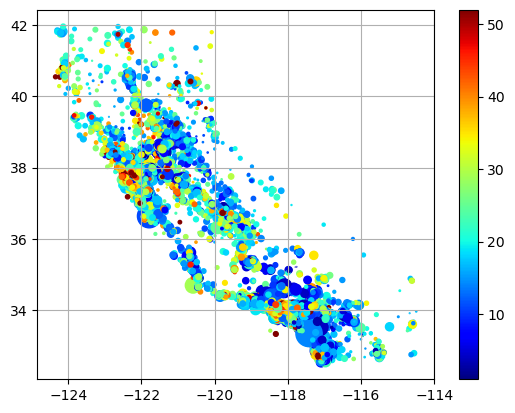

In [31]:
plt.scatter(train_set.longitude, train_set.latitude, c=train_set.housing_median_age, cmap='jet', s=train_set.population/100)
plt.colorbar()

# Outliers

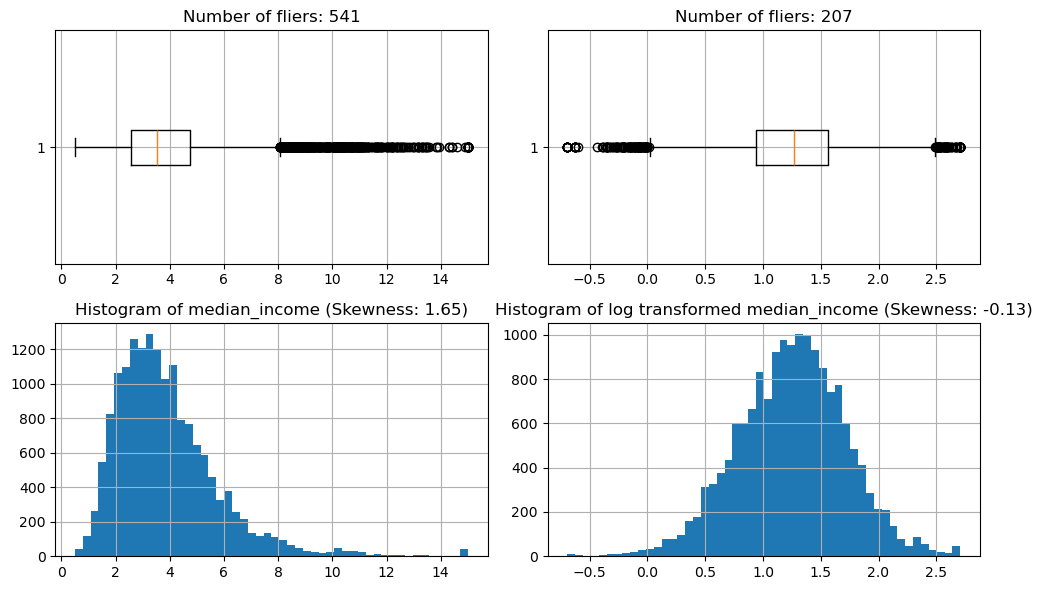

In [32]:
# import necessary libraries
from scipy.stats import skew

# Create figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Boxplot of original median_income
fliers = axes[0][0].boxplot(train_set.median_income, vert=False, whis=1.5)['fliers'][0].get_ydata()
axes[0][0].set_title(f'Number of fliers: {len(fliers)}')

# Boxplot of log transformed median_income
log_median_income = np.log(train_set.median_income)
log_fliers = axes[0][1].boxplot(log_median_income, vert=False, whis=1.5)['fliers'][0].get_ydata()
axes[0][1].set_title(f'Number of fliers: {len(log_fliers)}')

# Histogram of original median_income
skewness_orig = skew(train_set.median_income)
axes[1][0].hist(train_set.median_income, 50)
axes[1][0].set_title(f'Histogram of median_income (Skewness: {skewness_orig:.2f})')

# Histogram of log transformed median_income
skewness_log = skew(log_median_income)
axes[1][1].hist(log_median_income, 50)
axes[1][1].set_title(f'Histogram of log transformed median_income (Skewness: {skewness_log:.2f})')

# Adjust subplot spacing and display the figure
plt.tight_layout()
plt.show()


<>:33: SyntaxWarning: invalid escape sequence '\l'
<>:33: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Asus\AppData\Local\Temp\ipykernel_14408\3498793846.py:33: SyntaxWarning: invalid escape sequence '\l'
  axes[i, 3].set_xlabel(f'{col} (Box-Cox $\lambda$={lambda_:.2f})')


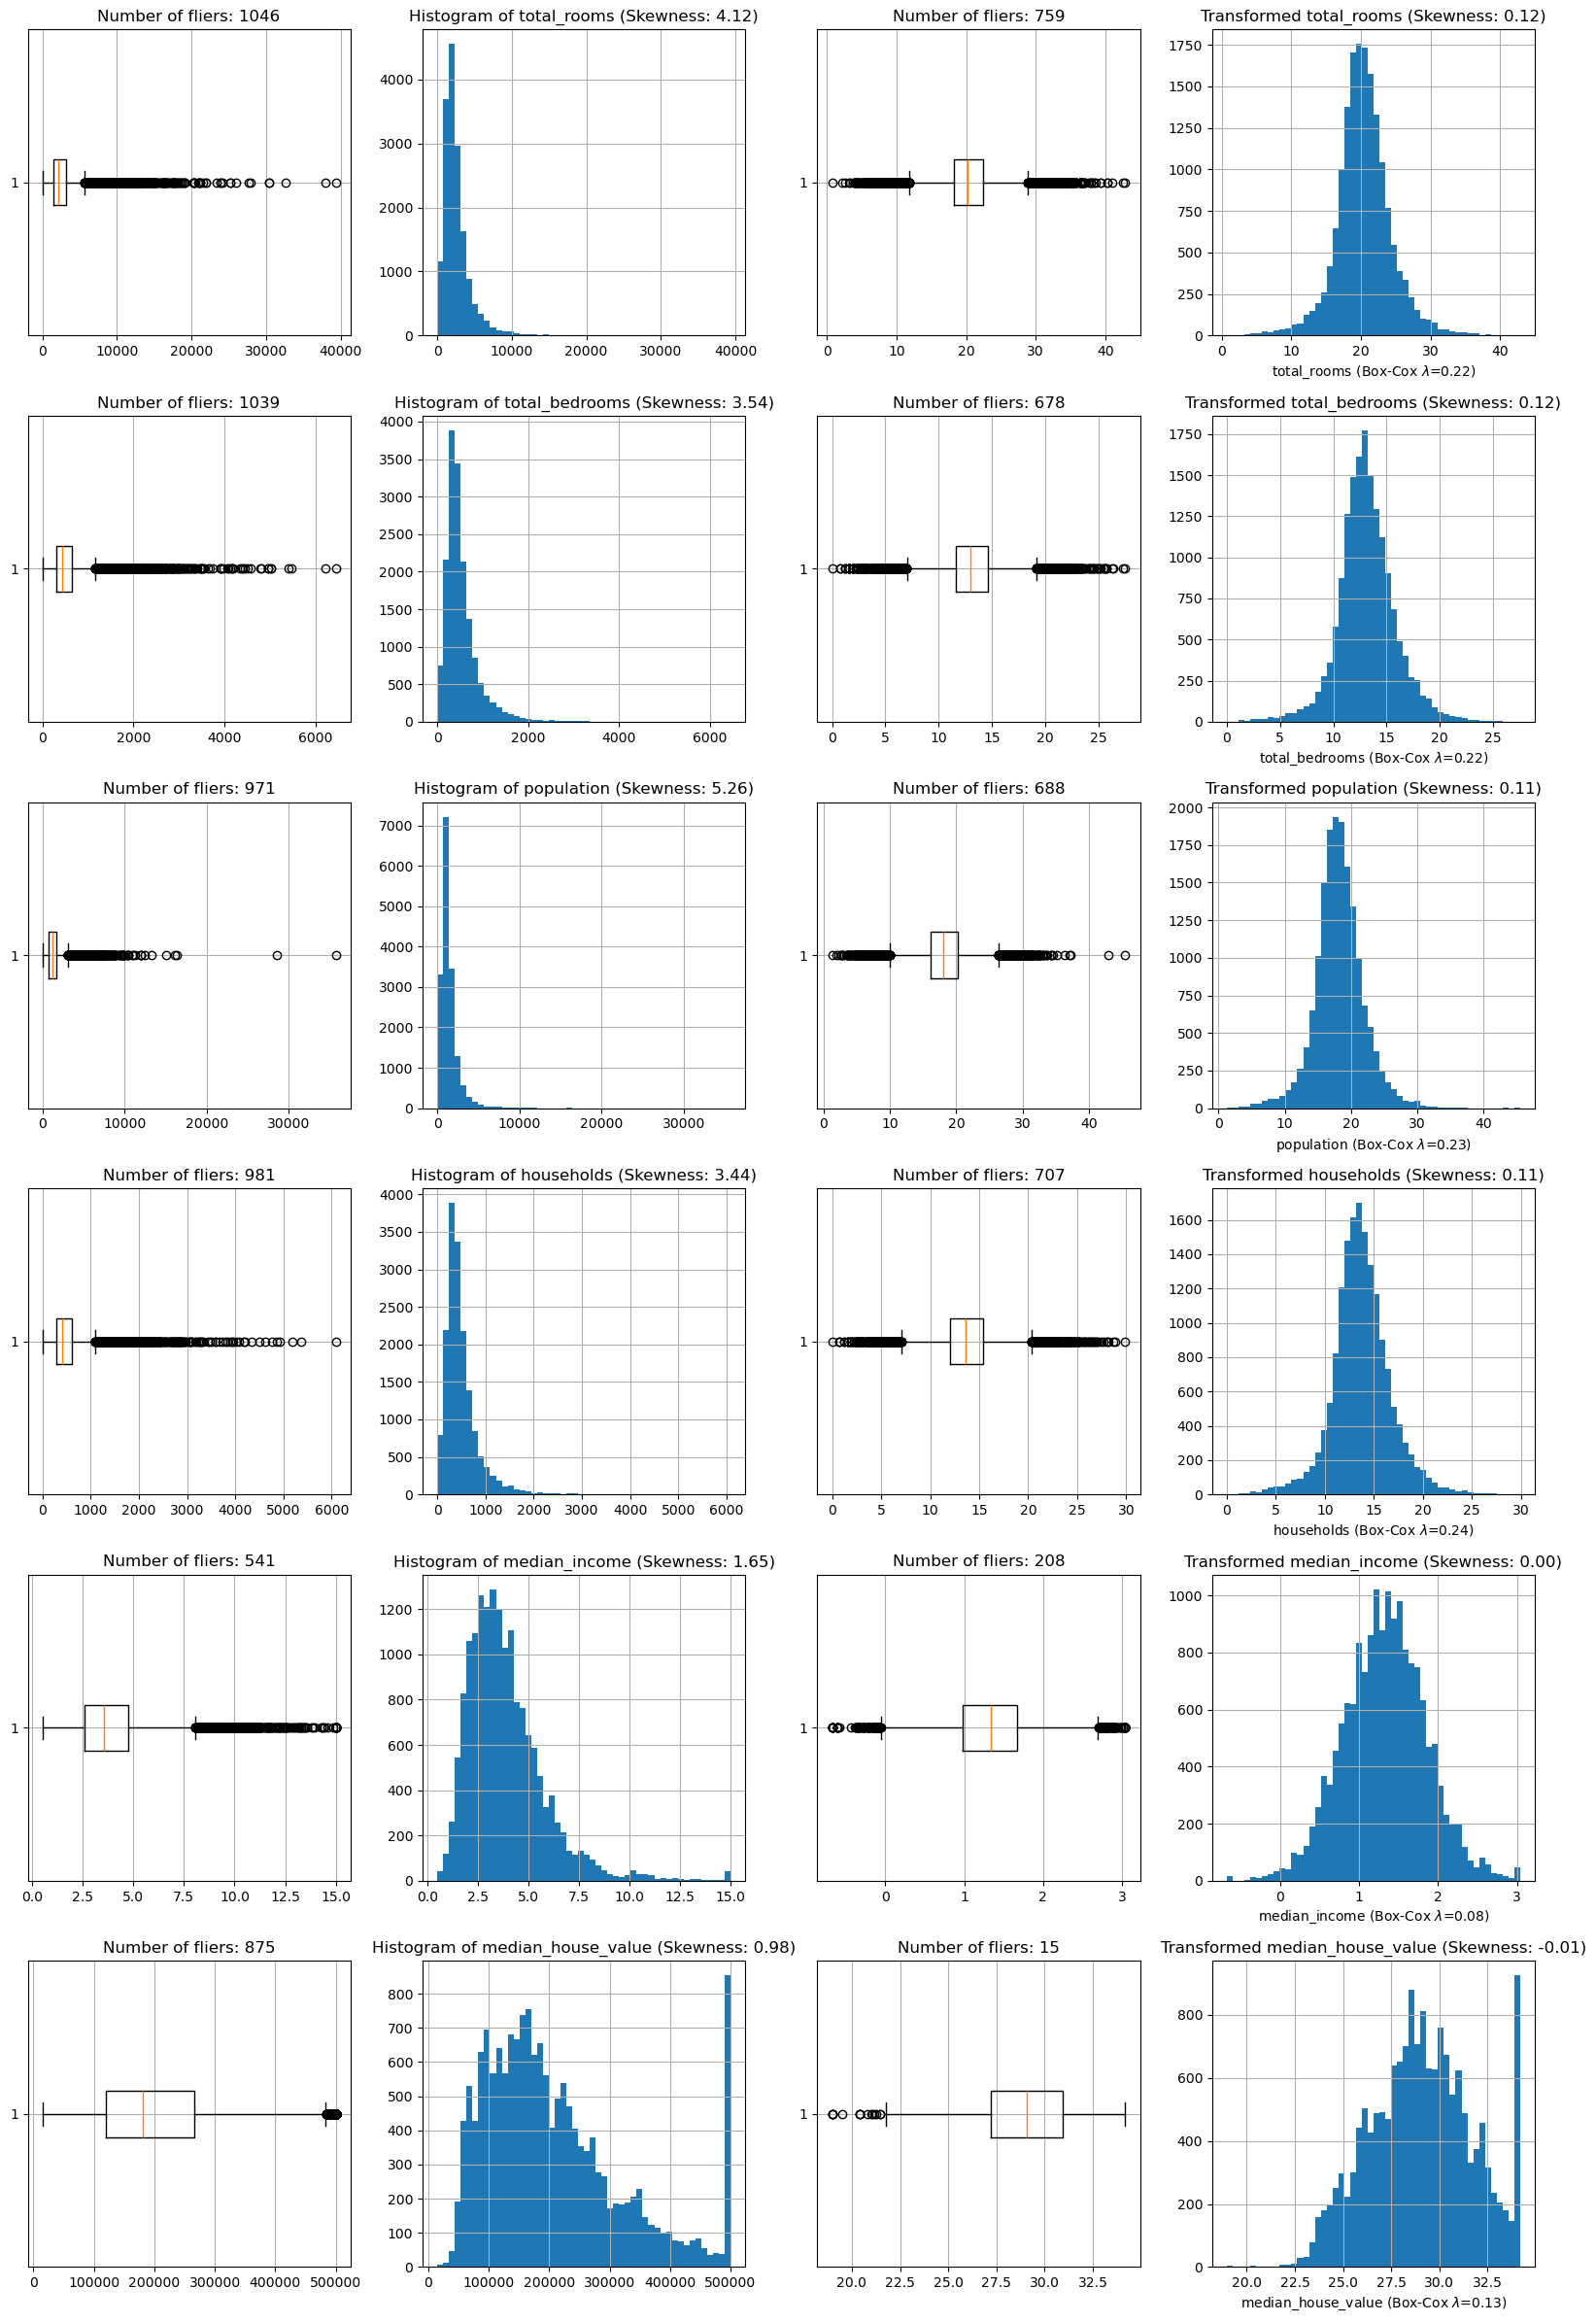

In [33]:
# import necessary libraries
from scipy.stats import skew, boxcox

cols = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
# Create figure with n_rows rows and 4 columns of subplots
n_rows = len(cols)
# n_rows = (df.select_dtypes(include='number').shape[1] + 3) // 4
fig, axes = plt.subplots(n_rows, 4, figsize=(16, 4*n_rows))

# iterate over numerical features and plot boxplots and histograms
for i, col in enumerate(cols):
    
    # compute skewness of original feature
    skewness_orig = skew(train_set[col])
    
    # plot boxplot of original feature
    fliers = axes[i, 0].boxplot(train_set[col], vert=False, whis=1.5)['fliers'][0].get_ydata()
    axes[i, 0].set_title(f'Number of fliers: {len(fliers)}')
    
    # plot histogram of original feature
    axes[i, 1].hist(train_set[col], 50)
    axes[i, 1].set_title(f'Histogram of {col} (Skewness: {skewness_orig:.2f})')
    
    # plot boxplot of Box-Cox transformed feature
    transformed_feature, lambda_ = boxcox(train_set[col])
    skewness_transformed = skew(transformed_feature)
    transformed_fliers = axes[i, 2].boxplot(transformed_feature, vert=False, whis=1.5)['fliers'][0].get_ydata()
    axes[i, 2].set_title(f'Number of fliers: {len(transformed_fliers)}')
    
    # plot histogram of Box-Cox transformed feature
    axes[i, 3].set_title(f'Transformed {col} (Skewness: {skewness_transformed:.2f})')
    axes[i, 3].hist(transformed_feature, 50)
    axes[i, 3].set_xlabel(f'{col} (Box-Cox $\lambda$={lambda_:.2f})')

# Adjust subplot spacing and display the figure
plt.tight_layout()
plt.show()


In [34]:
cols = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
train_set2 = train_set.copy()
for col in cols:
    train_set2[col], _ = boxcox(train_set[col])

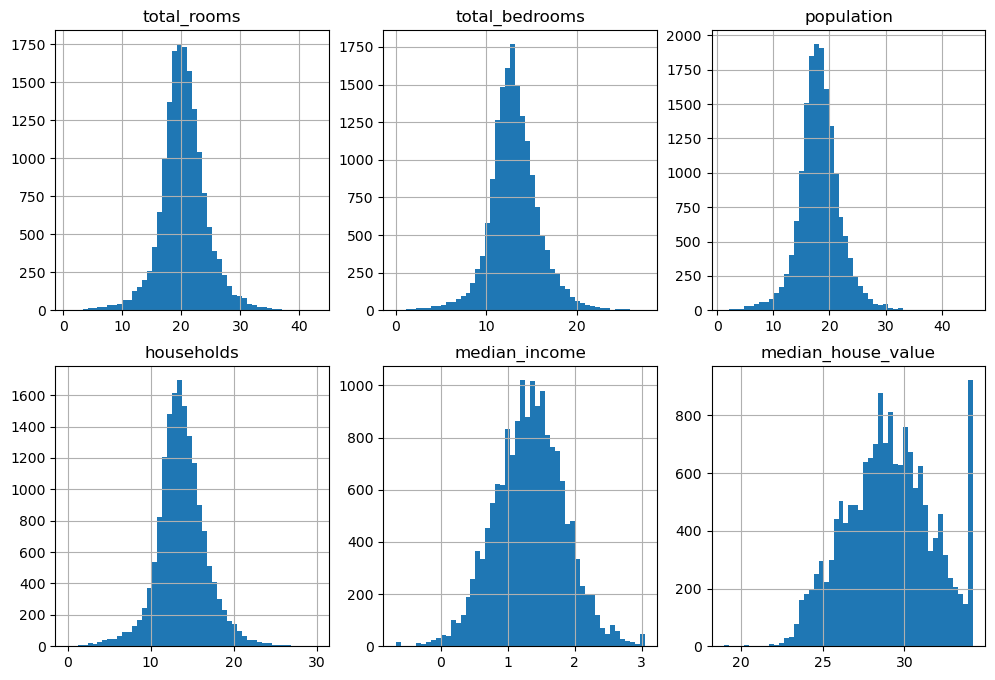

In [35]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes_flat = axes.flatten()

cols = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
for i, col in enumerate(cols):
    ax = axes_flat[i]
    ax.hist(train_set2[col], 50)
    ax.set_title(col)

<>:33: SyntaxWarning: invalid escape sequence '\l'
<>:33: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Asus\AppData\Local\Temp\ipykernel_14408\1602427176.py:33: SyntaxWarning: invalid escape sequence '\l'
  axes[i, 3].set_xlabel(f'{col} (Box-Cox $\lambda$={lambda_:.2f})')


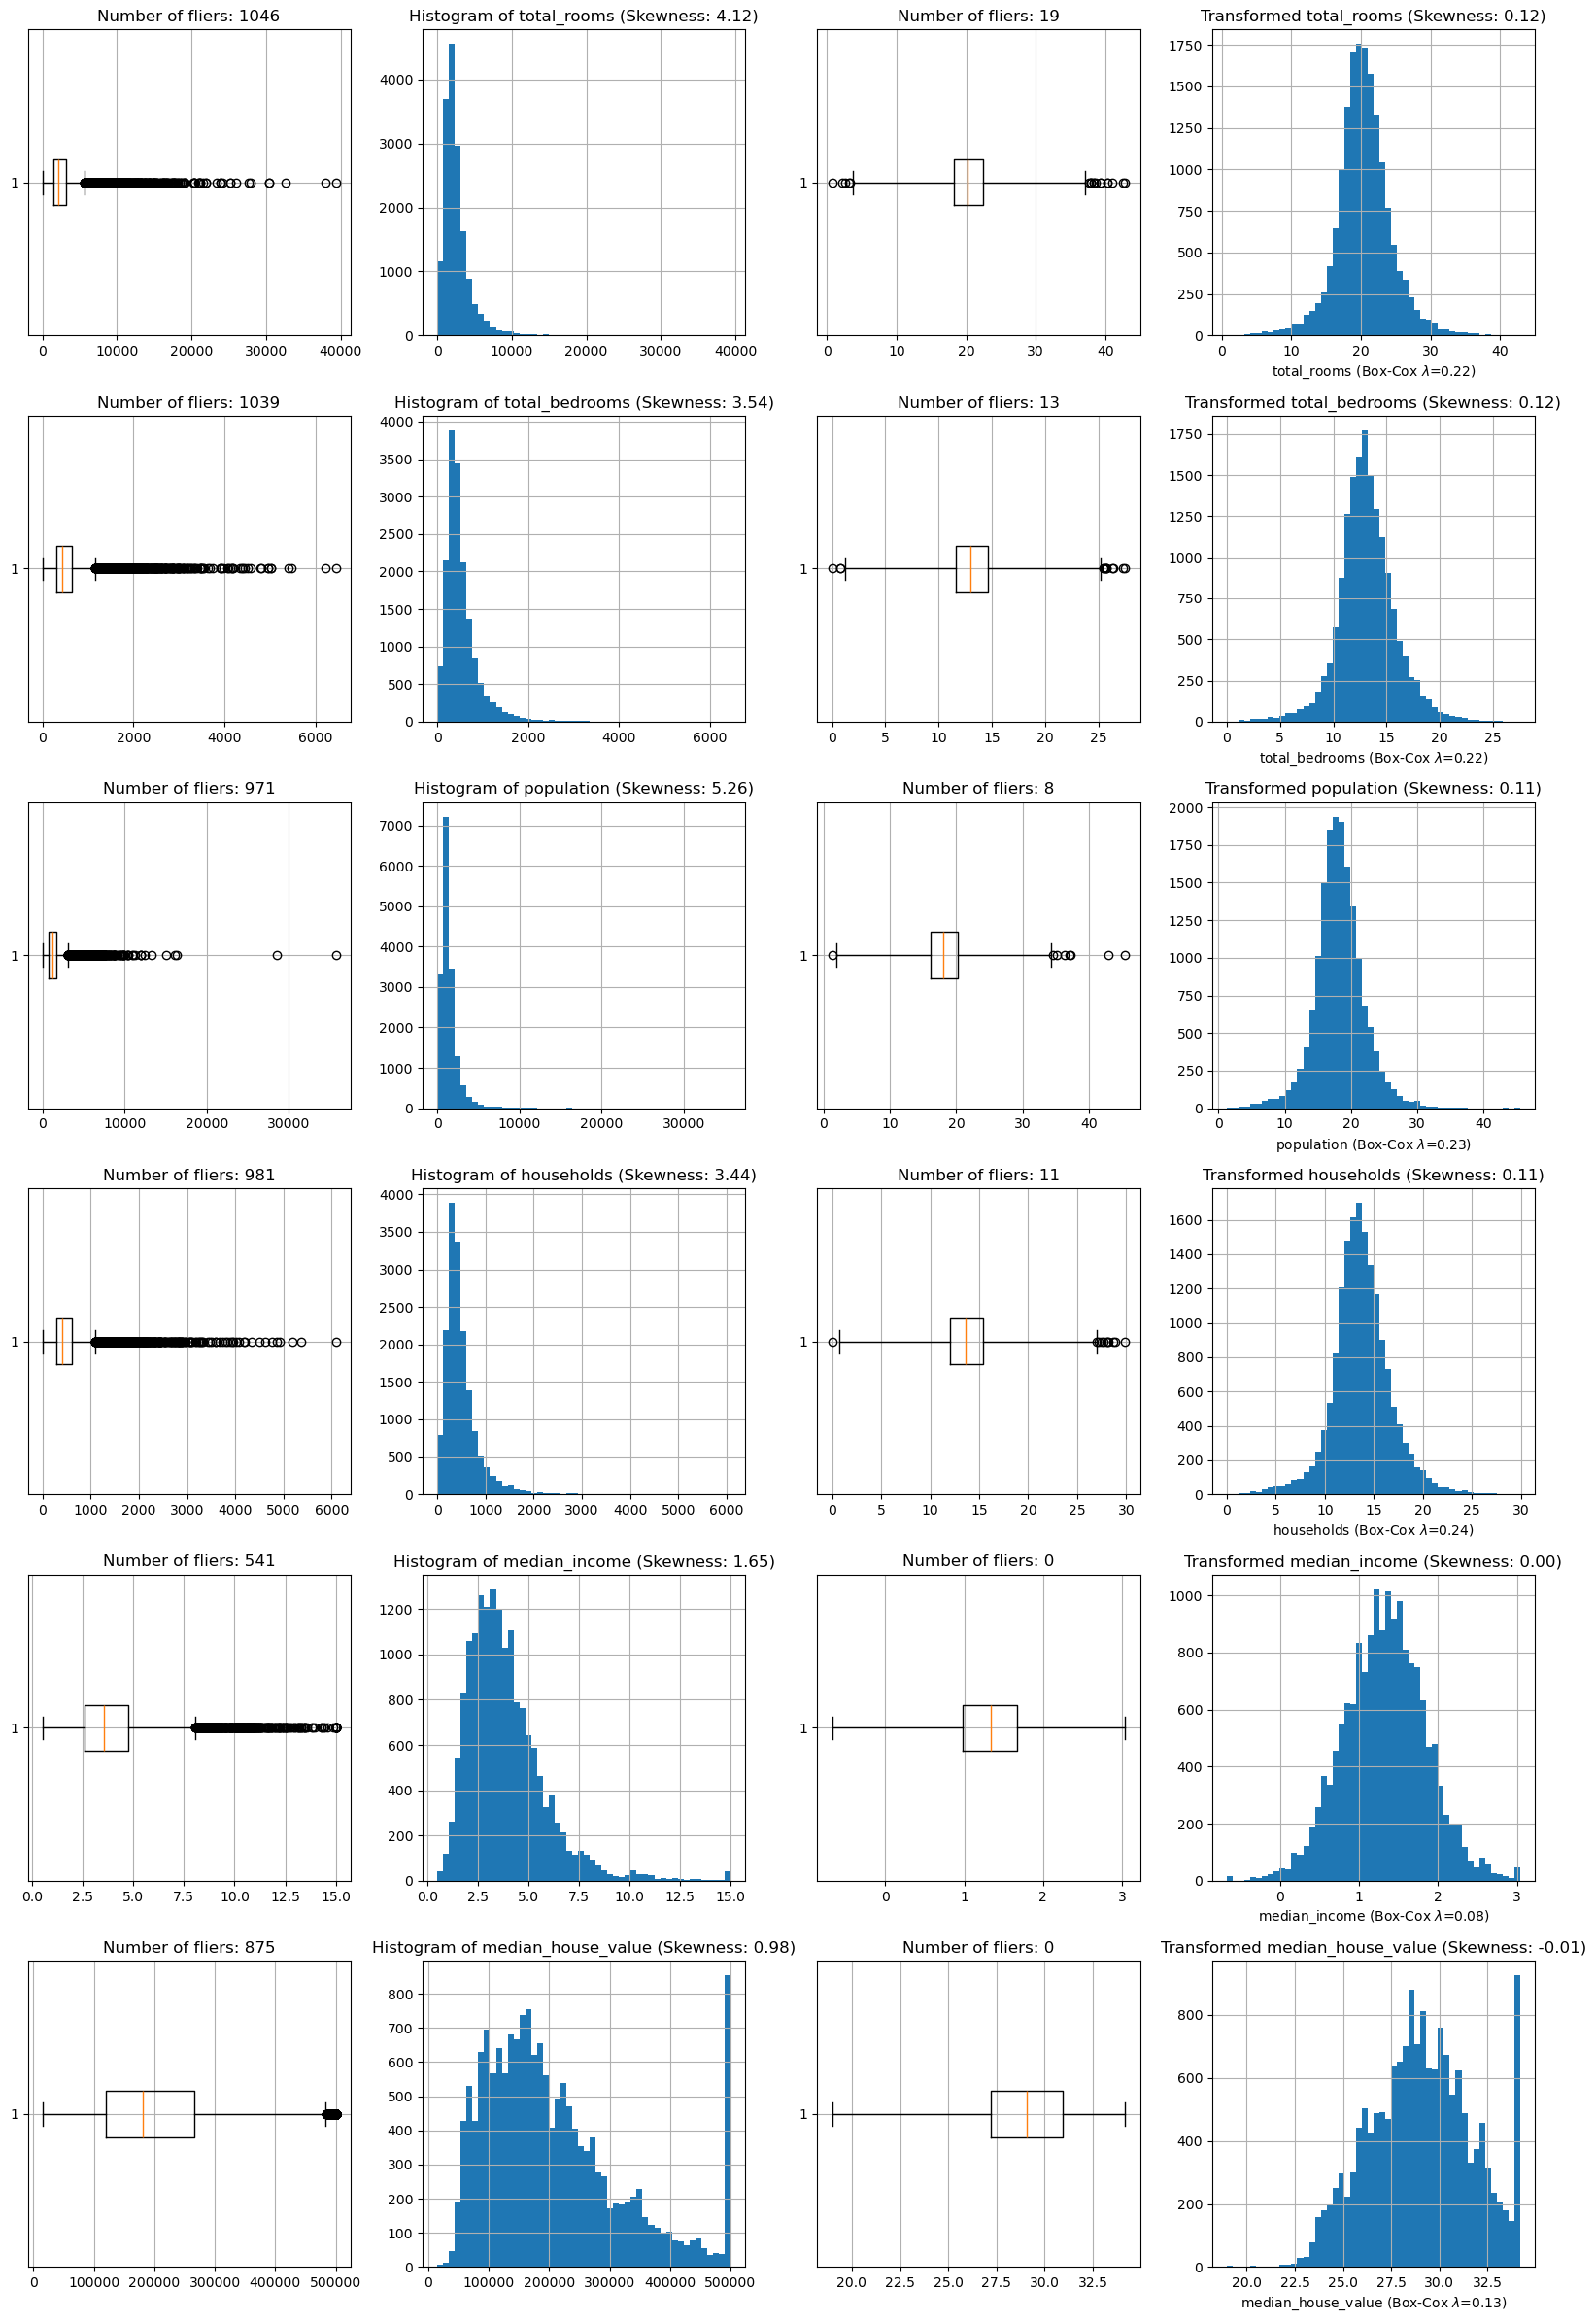

In [36]:
# import necessary libraries
from scipy.stats import skew, boxcox

cols = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
# Create figure with n_rows rows and 4 columns of subplots
n_rows = len(cols)
# n_rows = (df.select_dtypes(include='number').shape[1] + 3) // 4
fig, axes = plt.subplots(n_rows, 4, figsize=(16, 4*n_rows))

# iterate over numerical features and plot boxplots and histograms
for i, col in enumerate(cols):
    
    # compute skewness of original feature
    skewness_orig = skew(train_set[col])
    
    # plot boxplot of original feature
    fliers = axes[i, 0].boxplot(train_set[col], vert=False, whis=1.5)['fliers'][0].get_ydata()
    axes[i, 0].set_title(f'Number of fliers: {len(fliers)}')
    
    # plot histogram of original feature
    axes[i, 1].hist(train_set[col], 50)
    axes[i, 1].set_title(f'Histogram of {col} (Skewness: {skewness_orig:.2f})')
    
    # plot boxplot of Box-Cox transformed feature
    transformed_feature, lambda_ = boxcox(train_set[col])
    skewness_transformed = skew(transformed_feature)
    transformed_fliers = axes[i, 2].boxplot(transformed_feature, vert=False, whis=3.5)['fliers'][0].get_ydata()
    axes[i, 2].set_title(f'Number of fliers: {len(transformed_fliers)}')
    
    # plot histogram of Box-Cox transformed feature
    axes[i, 3].set_title(f'Transformed {col} (Skewness: {skewness_transformed:.2f})')
    axes[i, 3].hist(transformed_feature, 50)
    axes[i, 3].set_xlabel(f'{col} (Box-Cox $\lambda$={lambda_:.2f})')

# Adjust subplot spacing and display the figure
plt.tight_layout()
plt.show()


In [37]:
cols = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
desc = train_set2[cols].describe()
Q1 = desc.loc['25%']
Q3 = desc.loc['75%']
IQR = Q3 - Q1
lower_cap = Q1 - 3.5*IQR
upper_cap = Q3 + 3.5*IQR

flags = (train_set2[cols] < lower_cap) | (train_set2[cols] > upper_cap)
flags.sum()

total_rooms           19
total_bedrooms        13
population             8
households            11
median_income          0
median_house_value     0
dtype: int64

In [38]:
flags.sum(1).astype(np.bool_).sum()

24

In [39]:
train_set2 = train_set2[~flags.sum(1).astype(np.bool_)]
train_set2

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16456    -118.17     33.83                45.0    19.366145       11.770246   
3484     -122.11     37.37                49.0    16.727285       10.027018   
16089    -122.42     37.75                52.0    20.337761       14.348754   
18184    -117.09     32.64                24.0    23.342528       16.453544   
19393    -118.28     34.06                17.0    21.192312       17.446613   
...          ...       ...                 ...          ...             ...   
20608    -121.59     39.10                24.0    16.897418       11.098541   
13599    -122.25     37.45                34.0    22.211764       12.316692   
15262    -118.75     34.17                18.0    26.918009       15.870463   
8621     -118.02     33.95                36.0    19.056575       11.581190   
11159    -118.33     34.16                44.0    21.605280       14.633770   

       population  households  median_income  median_house_value  \
16456   16.177195   12.327108       1.693148           31.132613   
3484    13.212175   10.210282       2.148140           34.183723   
16089   19.223983   14.863797       1.274371           31.083840   
18184   21.081463   17.482943       0.685311           28.097074   
19393   23.712715   17.860257       0.554821           28.893124   
...           ...         ...            ...                 ...   
20608   15.982499   10.853845       0.552872           23.347929   
13599   16.895627   13.145031       2.574322           34.183723   
15262   22.929578   16.914897       2.081378           31.940333   
8621    16.588768   12.247355       1.632848           29.020731   
11159   20.047071   15.712060       1.298254           30.569704   

       ocean_proximity_1h_ocean  ocean_proximity_inland  \
16456                       0.0                     0.0   
3484                        0.0                     0.0   
16089                       0.0                     0.0   
18184                       0.0                     0.0   
19393                       1.0                     0.0   
...                         ...                     ...   
20608                       0.0                     1.0   
13599                       0.0                     0.0   
15262                       0.0                     0.0   
8621                        1.0                     0.0   
11159                       1.0                     0.0   

       ocean_proximity_island  ocean_proximity_near_bay  \
16456                     0.0                       0.0   
3484                      0.0                       1.0   
16089                     0.0                       1.0   
18184                     0.0                       0.0   
19393                     0.0                       0.0   
...                       ...                       ...   
20608                     0.0                       0.0   
13599                     0.0                       0.0   
15262                     0.0                       0.0   
8621                      0.0                       0.0   
11159                     0.0                       0.0   

       ocean_proximity_near_ocean  
16456                         1.0  
3484                          0.0  
16089                         0.0  
18184                         1.0  
19393                         0.0  
...                           ...  
20608                         0.0  
13599                         1.0  
15262                         1.0  
8621                          0.0  
11159                         0.0  

[16488 rows x 14 columns]

3961


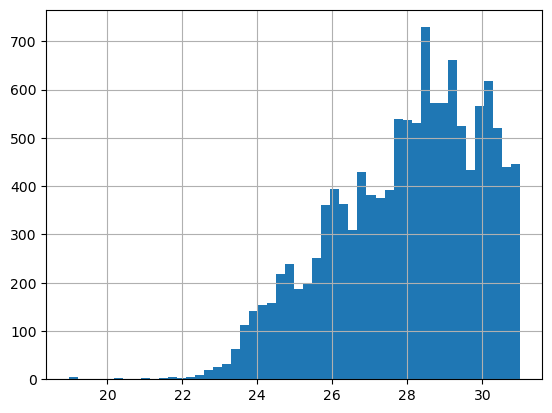

In [40]:
flags = train_set2.median_house_value < 31
print((~flags).sum())
plt.hist(train_set2.median_house_value[flags], 50);

In [41]:
train_set2 = train_set2[flags]
train_set2

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
18184    -117.09     32.64                24.0    23.342528       16.453544   
19393    -118.28     34.06                17.0    21.192312       17.446613   
13740    -119.63     36.70                42.0    17.819341       10.435131   
4025     -120.44     34.95                38.0    22.221671       15.519231   
7700     -119.69     36.69                36.0    18.159199       11.204475   
...          ...       ...                 ...          ...             ...   
12158    -117.36     34.10                33.0    19.642566       12.083897   
18085    -120.87     37.07                26.0    20.005474       12.675181   
20608    -121.59     39.10                24.0    16.897418       11.098541   
8621     -118.02     33.95                36.0    19.056575       11.581190   
11159    -118.33     34.16                44.0    21.605280       14.633770   

       population  households  median_income  median_house_value  \
18184   21.081463   17.482943       0.685311           28.097074   
19393   23.712715   17.860257       0.554821           28.893124   
13740   14.969585   11.145624       1.181036           27.633890   
4025    22.685454   16.361075       0.850727           26.623895   
7700    16.389226   11.389325       0.793764           25.810148   
...           ...         ...            ...                 ...   
12158   18.908912   12.781939       1.359475           26.025171   
18085   18.816845   13.632999       1.362670           25.824777   
20608   15.982499   10.853845       0.552872           23.347929   
8621    16.588768   12.247355       1.632848           29.020731   
11159   20.047071   15.712060       1.298254           30.569704   

       ocean_proximity_1h_ocean  ocean_proximity_inland  \
18184                       0.0                     0.0   
19393                       1.0                     0.0   
13740                       0.0                     1.0   
4025                        1.0                     0.0   
7700                        0.0                     1.0   
...                         ...                     ...   
12158                       0.0                     1.0   
18085                       0.0                     1.0   
20608                       0.0                     1.0   
8621                        1.0                     0.0   
11159                       1.0                     0.0   

       ocean_proximity_island  ocean_proximity_near_bay  \
18184                     0.0                       0.0   
19393                     0.0                       0.0   
13740                     0.0                       0.0   
4025                      0.0                       0.0   
7700                      0.0                       0.0   
...                       ...                       ...   
12158                     0.0                       0.0   
18085                     0.0                       0.0   
20608                     0.0                       0.0   
8621                      0.0                       0.0   
11159                     0.0                       0.0   

       ocean_proximity_near_ocean  
18184                         1.0  
19393                         0.0  
13740                         0.0  
4025                          0.0  
7700                          0.0  
...                           ...  
12158                         0.0  
18085                         0.0  
20608                         0.0  
8621                          0.0  
11159                         0.0  

[12527 rows x 14 columns]

In [42]:
train_set2.iloc[:, 8:].sum()

median_house_value            350167.039753
ocean_proximity_1h_ocean        5106.000000
ocean_proximity_inland          4953.000000
ocean_proximity_island             0.000000
ocean_proximity_near_bay        1131.000000
ocean_proximity_near_ocean      1337.000000
dtype: float64

In [43]:
train_set2.drop(columns='ocean_proximity_island', inplace=True)
train_set2

C:\Users\Asus\AppData\Local\Temp\ipykernel_14408\426857498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set2.drop(columns='ocean_proximity_island', inplace=True)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
18184    -117.09     32.64                24.0    23.342528       16.453544   
19393    -118.28     34.06                17.0    21.192312       17.446613   
13740    -119.63     36.70                42.0    17.819341       10.435131   
4025     -120.44     34.95                38.0    22.221671       15.519231   
7700     -119.69     36.69                36.0    18.159199       11.204475   
...          ...       ...                 ...          ...             ...   
12158    -117.36     34.10                33.0    19.642566       12.083897   
18085    -120.87     37.07                26.0    20.005474       12.675181   
20608    -121.59     39.10                24.0    16.897418       11.098541   
8621     -118.02     33.95                36.0    19.056575       11.581190   
11159    -118.33     34.16                44.0    21.605280       14.633770   

       population  households  median_income  median_house_value  \
18184   21.081463   17.482943       0.685311           28.097074   
19393   23.712715   17.860257       0.554821           28.893124   
13740   14.969585   11.145624       1.181036           27.633890   
4025    22.685454   16.361075       0.850727           26.623895   
7700    16.389226   11.389325       0.793764           25.810148   
...           ...         ...            ...                 ...   
12158   18.908912   12.781939       1.359475           26.025171   
18085   18.816845   13.632999       1.362670           25.824777   
20608   15.982499   10.853845       0.552872           23.347929   
8621    16.588768   12.247355       1.632848           29.020731   
11159   20.047071   15.712060       1.298254           30.569704   

       ocean_proximity_1h_ocean  ocean_proximity_inland  \
18184                       0.0                     0.0   
19393                       1.0                     0.0   
13740                       0.0                     1.0   
4025                        1.0                     0.0   
7700                        0.0                     1.0   
...                         ...                     ...   
12158                       0.0                     1.0   
18085                       0.0                     1.0   
20608                       0.0                     1.0   
8621                        1.0                     0.0   
11159                       1.0                     0.0   

       ocean_proximity_near_bay  ocean_proximity_near_ocean  
18184                       0.0                         1.0  
19393                       0.0                         0.0  
13740                       0.0                         0.0  
4025                        0.0                         0.0  
7700                        0.0                         0.0  
...                         ...                         ...  
12158                       0.0                         0.0  
18085                       0.0                         0.0  
20608                       0.0                         0.0  
8621                        0.0                         0.0  
11159                       0.0                         0.0  

[12527 rows x 13 columns]

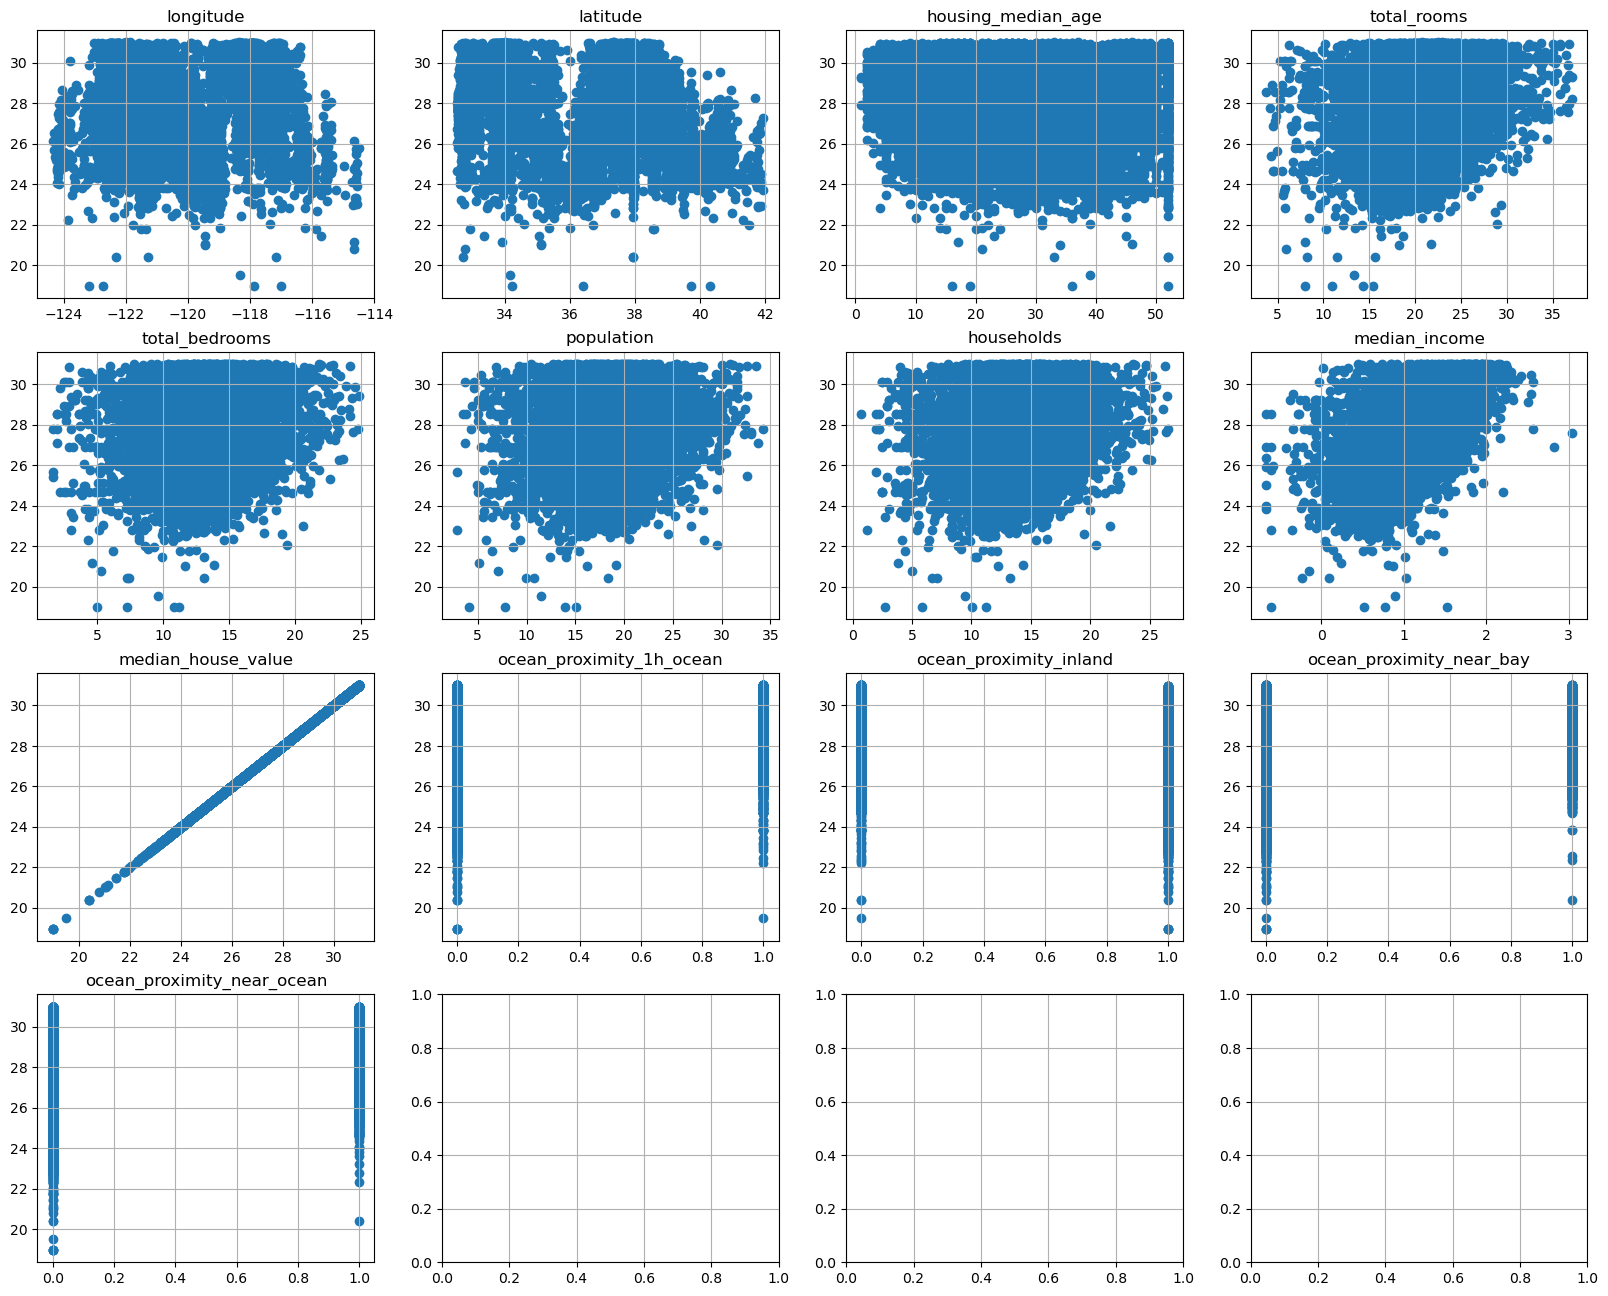

In [44]:
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes_flat = axes.flatten()

for i, col in enumerate(train_set2.columns):
    ax = axes_flat[i]
    ax.scatter(train_set2[col], train_set2.median_house_value)
    ax.set_title(col)

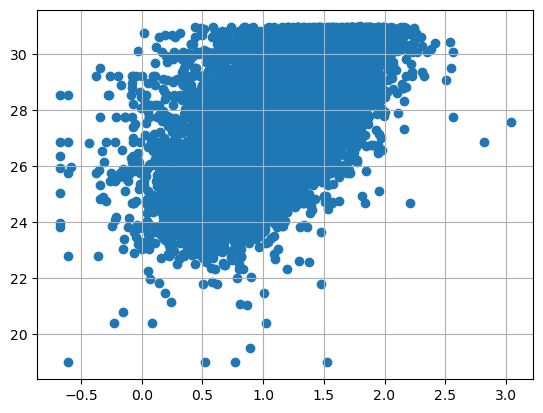

In [45]:
flags = (train_set2.median_income > 2.5) & (train_set2.median_house_value < 26)
plt.scatter(train_set2.median_income[~flags], train_set2.median_house_value[~flags])

plt.scatter(train_set2.median_income[flags], train_set2.median_house_value[flags])

# feature reduction

In [46]:
corr = train_set2.corr()
corr[['median_house_value']].abs().sort_values(by='median_house_value')

median_house_value
housing_median_age                    0.007400
longitude                             0.043712
ocean_proximity_near_ocean            0.099394
ocean_proximity_near_bay              0.118852
population                            0.124930
total_bedrooms                        0.134456
households                            0.164643
total_rooms                           0.180706
latitude                              0.238426
ocean_proximity_1h_ocean              0.418606
ocean_proximity_inland                0.553142
median_income                         0.583162
median_house_value                    1.000000

In [47]:
train_set2.drop(['population'], axis=1, inplace=True)
train_set2

C:\Users\Asus\AppData\Local\Temp\ipykernel_14408\3382363059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set2.drop(['population'], axis=1, inplace=True)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
18184    -117.09     32.64                24.0    23.342528       16.453544   
19393    -118.28     34.06                17.0    21.192312       17.446613   
13740    -119.63     36.70                42.0    17.819341       10.435131   
4025     -120.44     34.95                38.0    22.221671       15.519231   
7700     -119.69     36.69                36.0    18.159199       11.204475   
...          ...       ...                 ...          ...             ...   
12158    -117.36     34.10                33.0    19.642566       12.083897   
18085    -120.87     37.07                26.0    20.005474       12.675181   
20608    -121.59     39.10                24.0    16.897418       11.098541   
8621     -118.02     33.95                36.0    19.056575       11.581190   
11159    -118.33     34.16                44.0    21.605280       14.633770   

       households  median_income  median_house_value  \
18184   17.482943       0.685311           28.097074   
19393   17.860257       0.554821           28.893124   
13740   11.145624       1.181036           27.633890   
4025    16.361075       0.850727           26.623895   
7700    11.389325       0.793764           25.810148   
...           ...            ...                 ...   
12158   12.781939       1.359475           26.025171   
18085   13.632999       1.362670           25.824777   
20608   10.853845       0.552872           23.347929   
8621    12.247355       1.632848           29.020731   
11159   15.712060       1.298254           30.569704   

       ocean_proximity_1h_ocean  ocean_proximity_inland  \
18184                       0.0                     0.0   
19393                       1.0                     0.0   
13740                       0.0                     1.0   
4025                        1.0                     0.0   
7700                        0.0                     1.0   
...                         ...                     ...   
12158                       0.0                     1.0   
18085                       0.0                     1.0   
20608                       0.0                     1.0   
8621                        1.0                     0.0   
11159                       1.0                     0.0   

       ocean_proximity_near_bay  ocean_proximity_near_ocean  
18184                       0.0                         1.0  
19393                       0.0                         0.0  
13740                       0.0                         0.0  
4025                        0.0                         0.0  
7700                        0.0                         0.0  
...                         ...                         ...  
12158                       0.0                         0.0  
18085                       0.0                         0.0  
20608                       0.0                         0.0  
8621                        0.0                         0.0  
11159                       0.0                         0.0  

[12527 rows x 12 columns]

# Data Normalization

In [48]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [49]:
normz=MinMaxScaler()
train_set2=normz.fit_transform(train_set2)
train_set2


array([[0.73630832, 0.01062699, 0.45098039, ..., 0.        , 0.        ,
        1.        ],
       [0.61561866, 0.16153029, 0.31372549, ..., 0.        , 0.        ,
        0.        ],
       [0.47870183, 0.44208289, 0.80392157, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.27991886, 0.69713071, 0.45098039, ..., 1.        , 0.        ,
        0.        ],
       [0.64198783, 0.1498406 , 0.68627451, ..., 0.        , 0.        ,
        0.        ],
       [0.61054767, 0.17215728, 0.84313725, ..., 0.        , 0.        ,
        0.        ]])

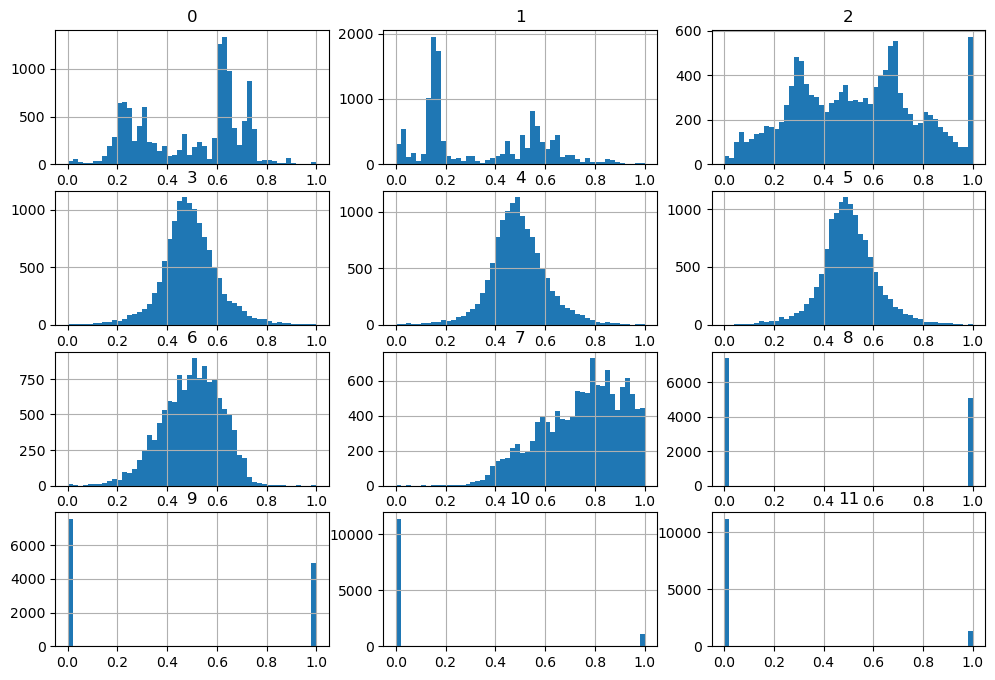

In [50]:
fig, axes = plt.subplots(4, 3, figsize=(12, 8))
axes_flat = axes.flatten()

for i, col in enumerate(range(train_set2.shape[1])):
    ax = axes_flat[i]
    ax.hist(train_set2[:, col], 50)
    ax.set_title(col)

# Model Selection

In [51]:
x_train=np.delete(train_set2,-5,axis=1)
y_train=train_set2[:,[-5]]
x_train.shape,y_train.shape

((12527, 11), (12527, 1))

In [52]:
from sklearn.linear_model import SGDRegressor
model=SGDRegressor(random_state=31)

In [53]:
lrs = np.logspace(-3, 0, 50)
alphas = np.logspace(-6, 0, 50)
param_distr = {'eta0': lrs, 'alpha': alphas}

In [54]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

random_search = RandomizedSearchCV(model, param_distr, n_iter=250, random_state=31)
random_search.fit(x_train, y_train.ravel())

random_search.best_params_, random_search.best_score_

({'eta0': 0.7543120063354615, 'alpha': 0.0003727593720314938},
 0.5739632759050505)

In [55]:
lr, alpha = random_search.best_params_.values()

d1, d2 = 0.1, 0.1
lrs = np.r_[np.linspace((1-d1)*lr, (1+d1)*lr, 50), lr]
alphas = np.r_[np.linspace((1+d2)*alpha, (1+d2)*alpha, 50), alpha]

param_grid = {'eta0': lrs, 'alpha': alphas}

In [56]:
grid_search = GridSearchCV(model, param_grid)
grid_search.fit(x_train, y_train.ravel())

# Best parameters
grid_search.best_params_, grid_search.best_score_

({'alpha': 0.0003727593720314938, 'eta0': 0.6788808057019153},
 0.5768052918642556)

# Best Model

In [57]:
model = grid_search.best_estimator_
model.coef_, model.intercept_

(array([-0.29234514, -0.28059132,  0.00514316, -0.08647974,  0.26758006,
        -0.01961924,  0.69795681,  0.07894349, -0.05416591,  0.07373082,
         0.05403309]),
 array([0.54330393]))

# Saving Best Model

In [58]:
import joblib

In [59]:
joblib.dump(model, f'best-model-{grid_search.best_score_:.3f}.pkl')

['best-model-0.577.pkl']

<Axes: >

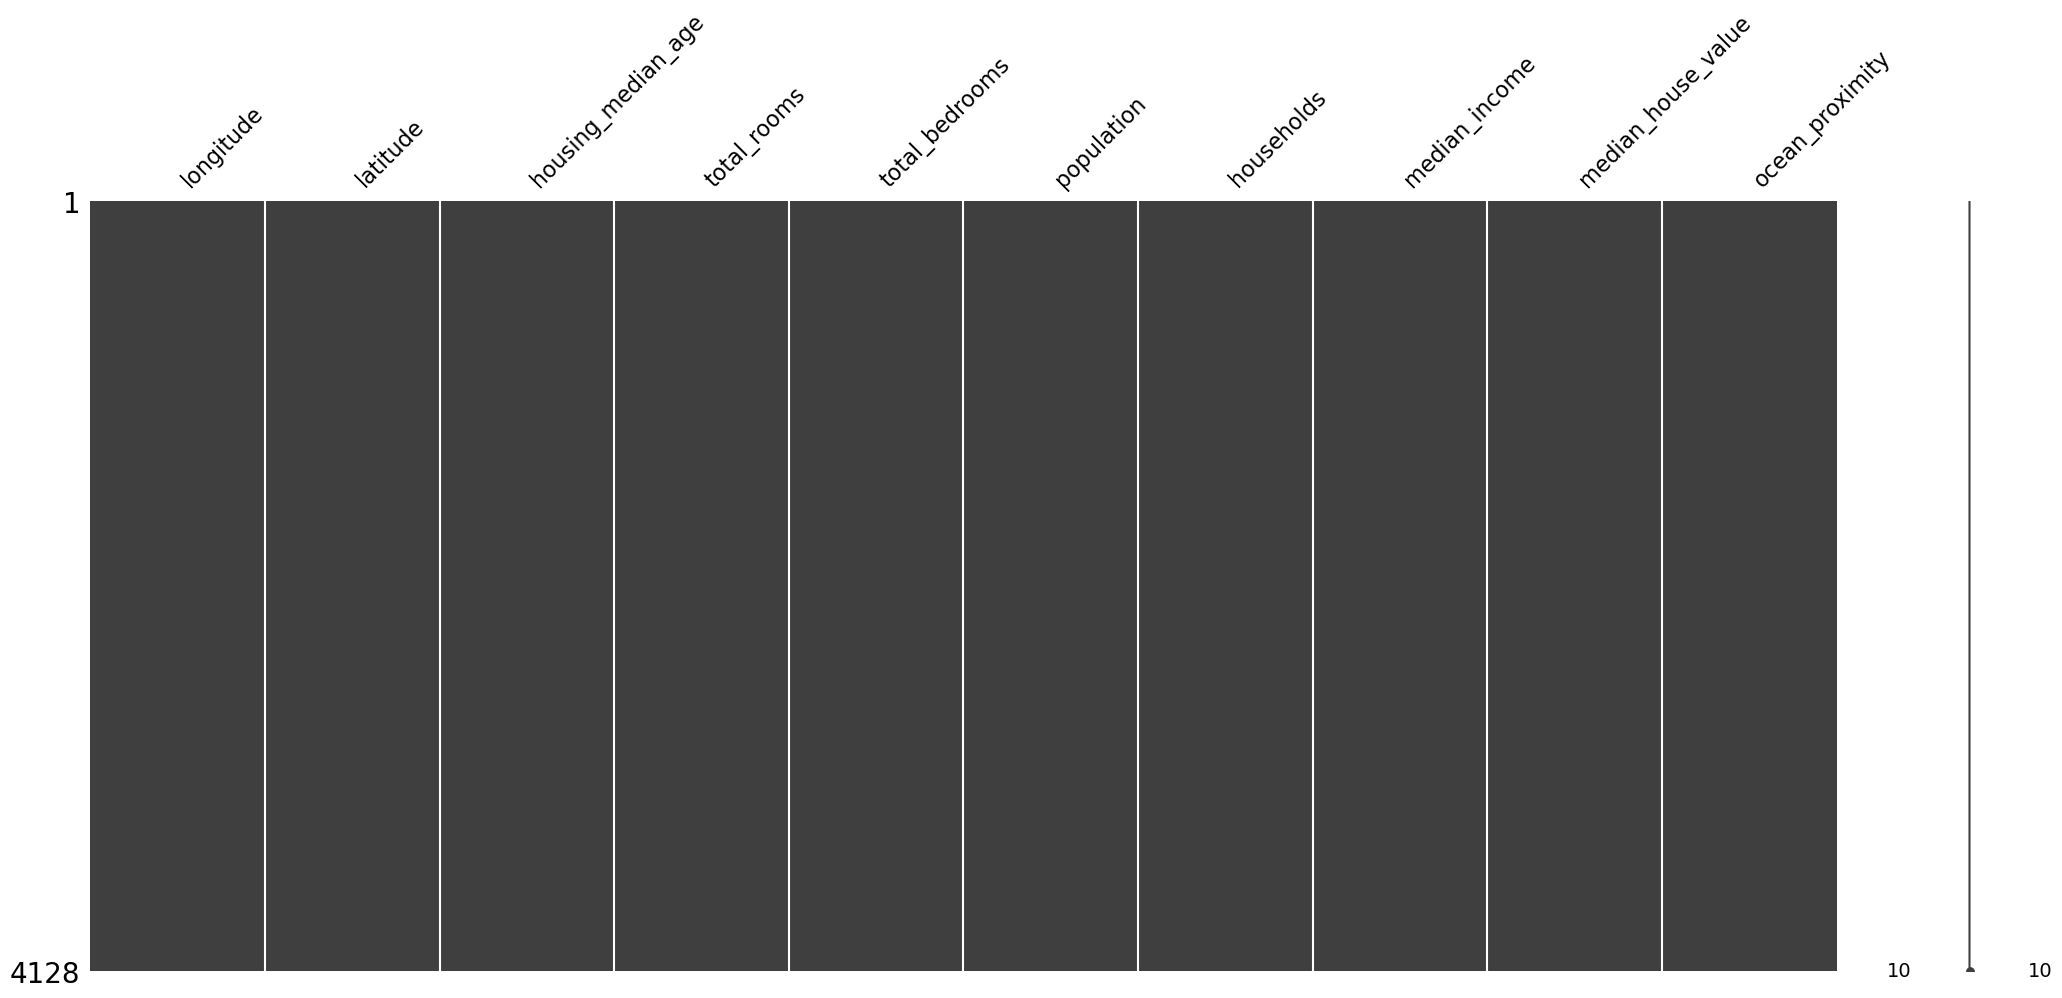

In [64]:
msno.matrix(test_set)

In [61]:
test_set['total_bedrooms'].fillna(m, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_14408\1860508251.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_set['total_bedrooms'].fillna(m, inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14408\1860508251.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<mpl_toolkits.basemap.Basemap object at 0x0000026494C65550>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test_set['total_bedroo

In [65]:
test_set=pd.get_dummies(test_set,columns=['ocean_proximity'],dtype=np.float64)
test_set

longitude  latitude  housing_median_age  total_rooms total_bedrooms  \
9230     -122.26     37.77                52.0       1210.0          168.0   
9789     -122.33     40.48                26.0        695.0          126.0   
222      -117.76     34.06                30.0       1700.0          504.0   
10365    -117.96     33.69                20.0       3123.0          441.0   
8885     -117.96     34.06                31.0       2017.0          462.0   
...          ...       ...                 ...          ...            ...   
10326    -116.82     34.24                11.0       5799.0         1527.0   
20043    -119.80     37.50                15.0        989.0          184.0   
5414     -122.10     37.66                34.0        656.0          115.0   
1005     -118.06     34.06                28.0       1778.0          605.0   
5542     -118.24     34.16                52.0        850.0          162.0   

       population  households  median_income  median_house_value  \
9230        411.0       172.0         3.3571            405400.0   
9789        319.0       124.0         3.2788            101600.0   
222        1719.0       459.0         2.2270             91900.0   
10365      1319.0       432.0         6.0910            290400.0   
8885       1462.0       457.0         2.0670            167300.0   
...           ...         ...            ...                 ...   
10326       713.0       262.0         2.5147             84700.0   
20043       406.0       151.0         3.1771            121900.0   
5414        342.0       112.0         4.6875            200600.0   
1005       2184.0       574.0         1.9189            165900.0   
5542        493.0       160.0         6.9408            298800.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
9230                         0.0                     0.0   
9789                         0.0                     1.0   
222                          0.0                     1.0   
10365                        1.0                     0.0   
8885                         1.0                     0.0   
...                          ...                     ...   
10326                        0.0                     1.0   
20043                        0.0                     1.0   
5414                         0.0                     0.0   
1005                         1.0                     0.0   
5542                         1.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
9230                      0.0                       1.0   
9789                      0.0                       0.0   
222                       0.0                       0.0   
10365                     0.0                       0.0   
8885                      0.0                       0.0   
...                       ...                       ...   
10326                     0.0                       0.0   
20043                     0.0                       0.0   
5414                      0.0                       1.0   
1005                      0.0                       0.0   
5542                      0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
9230                          0.0  
9789                          0.0  
222                           0.0  
10365                         0.0  
8885                          0.0  
...                           ...  
10326                         0.0  
20043                         0.0  
5414                          0.0  
1005                          0.0  
5542                          0.0  

[4128 rows x 14 columns]

In [66]:
test_set.rename(columns={'ocean_proximity_<1H OCEAN': 'ocean_proximity_1h_ocean', 
                         'ocean_proximity_INLAND': 'ocean_proximity_inland',
                         'ocean_proximity_ISLAND': 'ocean_proximity_island', 
                         'ocean_proximity_NEAR BAY': 'ocean_proximity_near_bay',
                         'ocean_proximity_NEAR OCEAN': 'ocean_proximity_near_ocean'}, inplace=True)
test_set.head()

longitude  latitude  housing_median_age  total_rooms total_bedrooms  \
9230     -122.26     37.77                52.0       1210.0          168.0   
9789     -122.33     40.48                26.0        695.0          126.0   
222      -117.76     34.06                30.0       1700.0          504.0   
10365    -117.96     33.69                20.0       3123.0          441.0   
8885     -117.96     34.06                31.0       2017.0          462.0   

       population  households  median_income  median_house_value  \
9230        411.0       172.0         3.3571            405400.0   
9789        319.0       124.0         3.2788            101600.0   
222        1719.0       459.0         2.2270             91900.0   
10365      1319.0       432.0         6.0910            290400.0   
8885       1462.0       457.0         2.0670            167300.0   

       ocean_proximity_1h_ocean  ocean_proximity_inland  \
9230                        0.0                     0.0   
9789                        0.0                     1.0   
222                         0.0                     1.0   
10365                       1.0                     0.0   
8885                        1.0                     0.0   

       ocean_proximity_island  ocean_proximity_near_bay  \
9230                      0.0                       1.0   
9789                      0.0                       0.0   
222                       0.0                       0.0   
10365                     0.0                       0.0   
8885                      0.0                       0.0   

       ocean_proximity_near_ocean  
9230                          0.0  
9789                          0.0  
222                           0.0  
10365                         0.0  
8885                          0.0

# feature reduction 

In [67]:
test_set.drop(columns=['population','ocean_proximity_island'], inplace=True)
test_set

longitude  latitude  housing_median_age  total_rooms total_bedrooms  \
9230     -122.26     37.77                52.0       1210.0          168.0   
9789     -122.33     40.48                26.0        695.0          126.0   
222      -117.76     34.06                30.0       1700.0          504.0   
10365    -117.96     33.69                20.0       3123.0          441.0   
8885     -117.96     34.06                31.0       2017.0          462.0   
...          ...       ...                 ...          ...            ...   
10326    -116.82     34.24                11.0       5799.0         1527.0   
20043    -119.80     37.50                15.0        989.0          184.0   
5414     -122.10     37.66                34.0        656.0          115.0   
1005     -118.06     34.06                28.0       1778.0          605.0   
5542     -118.24     34.16                52.0        850.0          162.0   

       households  median_income  median_house_value  \
9230        172.0         3.3571            405400.0   
9789        124.0         3.2788            101600.0   
222         459.0         2.2270             91900.0   
10365       432.0         6.0910            290400.0   
8885        457.0         2.0670            167300.0   
...           ...            ...                 ...   
10326       262.0         2.5147             84700.0   
20043       151.0         3.1771            121900.0   
5414        112.0         4.6875            200600.0   
1005        574.0         1.9189            165900.0   
5542        160.0         6.9408            298800.0   

       ocean_proximity_1h_ocean  ocean_proximity_inland  \
9230                        0.0                     0.0   
9789                        0.0                     1.0   
222                         0.0                     1.0   
10365                       1.0                     0.0   
8885                        1.0                     0.0   
...                         ...                     ...   
10326                       0.0                     1.0   
20043                       0.0                     1.0   
5414                        0.0                     0.0   
1005                        1.0                     0.0   
5542                        1.0                     0.0   

       ocean_proximity_near_bay  ocean_proximity_near_ocean  
9230                        1.0                         0.0  
9789                        0.0                         0.0  
222                         0.0                         0.0  
10365                       0.0                         0.0  
8885                        0.0                         0.0  
...                         ...                         ...  
10326                       0.0                         0.0  
20043                       0.0                         0.0  
5414                        1.0                         0.0  
1005                        0.0                         0.0  
5542                        0.0                         0.0  

[4128 rows x 12 columns]

# feature transform

In [69]:
cols = ['total_rooms', 'total_bedrooms', 'households', 'median_income', 'median_house_value']
train_set2 = train_set.copy()
lambda_list = []
for col in cols:
    train_set2[col], lmbda = boxcox(train_set[col])
    lambda_list.append(lmbda)
lambda_list

[0.22266934393387763,
 0.22497385081342108,
 0.2420581704196975,
 0.08409742925711734,
 0.1283237799648773]

In [74]:
from scipy.stats import boxcox

cols = ['total_rooms', 'total_bedrooms', 'households', 'median_income', 'median_house_value']

for i, col in enumerate(cols):
    # Convert to numeric if necessary
    test_set[col] = pd.to_numeric(test_set[col], errors='coerce')

    # Handle missing values (e.g., fill with small positive number or mean)
    test_set[col] = test_set[col].fillna(test_set[col].mean())

    # Ensure all values are strictly positive
    test_set[col] = test_set[col].apply(lambda x: x if x > 0 else 1e-6)

    # Apply boxcox
    test_set[col] = boxcox(test_set[col], lambda_list[i])

test_set


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
9230     -122.26     37.77                52.0     0.486989        9.631852   
9789     -122.33     40.48                26.0     0.407310        8.749644   
222      -117.76     34.06                30.0     0.531238       13.578748   
10365    -117.96     33.69                20.0     0.603459       13.045348   
8885     -117.96     34.06                31.0     0.552374       13.229359   
...          ...       ...                 ...          ...             ...   
10326    -116.82     34.24                11.0     0.669613       18.683593   
20043    -119.80     37.50                15.0     0.459183        9.922921   
5414     -122.10     37.66                34.0     0.398383        8.481245   
1005     -118.06     34.06                28.0     0.536852       14.334805   
5542     -118.24     34.16                52.0     0.437447        9.517149   

       households  median_income  median_house_value  \
9230    10.230539       1.274899           33.069031   
9789     9.136903       1.248795           26.420624   
222     14.082276       0.828226           25.982905   
10365   13.816950       1.951308           31.356623   
8885    14.063034       0.748725           28.681901   
...           ...            ...                 ...   
10326   11.770692       0.958853           25.631140   
20043    9.784922       1.214023           27.229787   
5414     8.814005       1.649749           29.541511   
1005    15.095137       0.669944           28.642590   
5542     9.981312       2.104183           31.500140   

       ocean_proximity_1h_ocean  ocean_proximity_inland  \
9230                        0.0                     0.0   
9789                        0.0                     1.0   
222                         0.0                     1.0   
10365                       1.0                     0.0   
8885                        1.0                     0.0   
...                         ...                     ...   
10326                       0.0                     1.0   
20043                       0.0                     1.0   
5414                        0.0                     0.0   
1005                        1.0                     0.0   
5542                        1.0                     0.0   

       ocean_proximity_near_bay  ocean_proximity_near_ocean  
9230                        1.0                         0.0  
9789                        0.0                         0.0  
222                         0.0                         0.0  
10365                       0.0                         0.0  
8885                        0.0                         0.0  
...                         ...                         ...  
10326                       0.0                         0.0  
20043                       0.0                         0.0  
5414                        1.0                         0.0  
1005                        0.0                         0.0  
5542                        0.0                         0.0  

[4128 rows x 12 columns]

# data normalization

In [75]:
test_set = normz.transform(test_set)
test_set

array([[0.21196755, 0.55579171, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.20486815, 0.84378321, 0.49019608, ..., 1.        , 0.        ,
        0.        ],
       [0.668357  , 0.16153029, 0.56862745, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.22819473, 0.54410202, 0.64705882, ..., 0.        , 1.        ,
        0.        ],
       [0.63793103, 0.16153029, 0.52941176, ..., 0.        , 0.        ,
        0.        ],
       [0.61967546, 0.17215728, 1.        , ..., 0.        , 0.        ,
        0.        ]])

### Coverting `test_set` to `X` & `y`

In [76]:
x_test = np.delete(test_set, -5, axis=1)
y_test = test_set[:, [-5]]
x_test.shape, y_test.shape

((4128, 11), (4128, 1))

### Load Model

In [77]:
model = joblib.load(f'best-model-{grid_search.best_score_:.3f}.pkl')
model.coef_

array([-0.29234514, -0.28059132,  0.00514316, -0.08647974,  0.26758006,
       -0.01961924,  0.69795681,  0.07894349, -0.05416591,  0.07373082,
        0.05403309])

# Test

In [78]:
model.score(x_test, y_test)

0.6055667043438357